<a id = '1.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color :#4682B4; border-radius: 5px 5px;"><strong>Google Play Store Apps</strong></p>


<img src="https://www.opticflux.com/wp-content/uploads/2021/05/Google-Play-Store.jpg" alt="Google Play Store (Android TV) Version 25.1.24 Improves Its Features -  Optic Flux" jsname="HiaYvf" jsaction="load:XAeZkd;" class="n3VNCb" data-noaft="1" style="margin-left: 10%; float: center;  border:5px solid ; width:70%; height : 100%;">

* Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today.

<a id = '0.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 

* [Importing libraries](#1.0)
* [Importing dataset](#2.0)
* [Basic Data Exploration(Understanding the Dataset](#3.0)
* [Data Cleaning](#0.0)
    * [Checking for null values](#5.0)
    * [delete data duplicated](#6.0)
    * [Check Qutliers](#7.0)
* [Exploratory Data Analysis (EDA)](#8.0)
* [Check Co-relation](#9.0)








<a id = '1.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Importing libraries</strong></p>

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

<a id = '2.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Importing dataset </strong></p>

In [271]:
data=pd.read_csv('C:/Users/Ahmed M Mahrous/Desktop/Machinfy internship/Google-Play-Store-Apps-main/googleplaystore.csv')

<a id = '3.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Basic Data Exploration(Understanding the Dataset</strong></p>



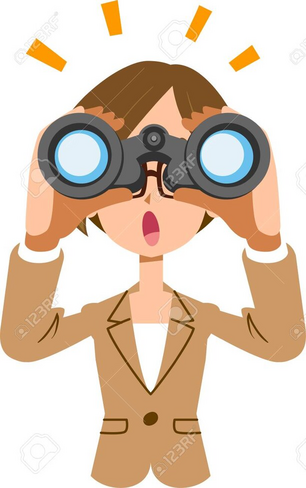

#### We will check the below things:

* head of the dataset
* the shape of the dataset
* datatypes for every column 
* summary of the dataset


In [272]:
data.head(10).style.background_gradient(cmap="Wistia")

In [273]:
# Take a sample of 5
data.sample(5)


App             Category  \
6501                               NOOK Audiobooks  BOOKS_AND_REFERENCE   
1497                  Living Room Decorating Ideas       HOUSE_AND_HOME   
7602                            Adventure Time Run                 GAME   
10170  Messages, Text and Video Chat for Messenger               SOCIAL   
2968                                      Futbol24               SPORTS   

       Rating Reviews                Size     Installs  Type Price  \
6501      3.5    2539                8.6M     500,000+  Free     0   
1497      4.0    4465                5.8M   1,000,000+  Free     0   
7602      4.3   24628                 88M   1,000,000+  Free     0   
10170     4.4   49580                4.0M  10,000,000+  Free     0   
2968      4.3   31908  Varies with device   1,000,000+  Free     0   

      Content Rating             Genres        Last Updated  \
6501        Everyone  Books & Reference       July 26, 2018   
1497        Everyone       House & Home       March 6, 2015   
7602        Everyone             Action       July 26, 2018   
10170       Everyone             Social        June 4, 2018   
2968        Everyone             Sports  September 27, 2017   

              Current Ver         Android Ver  
6501               v1.1.6          4.1 and up  
1497                  1.7          3.0 and up  
7602             1.25.396          4.4 and up  
10170                1.24          4.1 and up  
2968   Varies with device  Varies with device

In [274]:
data.shape

(10841, 13)

In [275]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [276]:
#The described method will help to see how data has been spread for numerical values.
# We can clearly see the minimum value, mean values, different percentile values, and maximum values.
data.describe().T

count      mean       std  min  25%  50%  75%   max
Rating  9367.0  4.193338  0.537431  1.0  4.0  4.3  4.5  19.0

In [277]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


* The data has 12 object and 1 numeric feature

#### we need to convert [`Reviews` & `Size`  &  `Installs` & `Price`] to int
* [Reviews](#11.0)
* [Size](#12.0)
* [Installs](#13.0) &  [Price](#14.0)

#### we need to Change Last update into a datetime column







* [Reviews](#1.0)


In [278]:
# Checking if all values in number of Reviews numeric
data.Reviews.str.isnumeric().sum()


10840

* One value is non numeric out of 10841. Lets find its value and id.


In [279]:
data[~data.Reviews.str.isnumeric()]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

We could have converted it into interger like we did for Size but the data for this App looks different. It can be noticed that the entries are entered wrong  We could fix it by setting Category as nan and shifting all the values, but deleting the sample for now.

In [280]:
data=data.drop(data.index[10472])

In [281]:
data["Reviews"] = data["Reviews"].astype(int)

In [282]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


* [Size](#12.0)

* It can be seen that data has metric prefixes (Kilo and Mega) along with another string. Replacing k and M with their values to convert values to numeric.

In [283]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

* Remove all characters from size and convert it to float

In [284]:
data['Size']=data['Size'].str.replace('M','000')
data['Size']=data['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
data['Size']=data['Size'].replace("Varies with device",np.nan)
data['Size']=data['Size'].astype('float')
data['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

* There is a problem!! There are some applications size in megabyte and some in kilobyte


In [285]:
###### Convert mega to kilo then convert all to mega
for i in data['Size']:
    if i < 10:
        data['Size']=data['Size'].replace(i,i*1000)
data['Size']=data['Size']/1000
data['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


* [Installs](#13.0) &  [Price](#13.0)


In [287]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [288]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [289]:
items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        data[col]=data[col].str.replace(item,'')
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type Price Content Rating  \
0      159  19.0     10000  Free     0       Everyone   
1      967  14.0    500000  Free     0       Everyone   
2    87510   8.7   5000000  Free     0       Everyone   
3   215644  25.0  50000000  Free     0           Teen   
4      967   2.8    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [290]:
data.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [291]:
data['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [292]:
data[data['Price']=='Everyone']

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [293]:
#data.drop(10472,inplace=True)
data[data['Price']=='Everyone']

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [294]:
data['Installs']=data['Installs'].astype('int')
data['Price']=data['Price'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


* [last updated](#12.0)

In [295]:
#### Change Last update into a datetime column
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [296]:
data['Updated_Day']=data['Last Updated'].dt.day
data['Updated_Month']=data['Last Updated'].dt.month
data['Updated_Year']=data['Last Updated'].dt.year

In [297]:
data.drop('Last Updated', axis=1, inplace=True)

In [298]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres         Current Ver   Android Ver  Updated_Day  \
0               Art & Design               1.0.0  4.0.3 and up            7   
1  Art & Design;Pretend Play               2.0.0  4.0.3 and up           15   
2               Art & Design               1.2.4  4.0.3 and up            1   
3               Art & Design  Varies with device    4.2 and up            8   
4    Art & Design;Creativity                 1.1    4.4 and up           20   

   Updated_Month  Updated_Year  
0              1          2018  
1              1          2018  
2              8          2018  
3              6          2018  
4              6          2018

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Day     10840 non-null  int64  
 13  Updated_Month   10840 non-null  int64  
 14  Updated_Year    10840 non-null  int64  
dtypes: float64(3), int32(2), int64(3), object(7)
memory usage: 1.2+ MB


#### Garbage in Garbage out

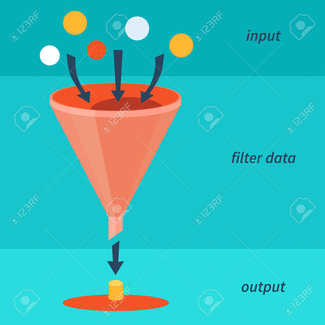

* Drop missing values. 
* Drop invalid values.
* Drop outlier.

<a id = '0.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #006400; border-radius: 5px 5px;"><strong>Data Cleaning</strong></p>


<a id = '5.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Checking for null values</strong></p>


In [300]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

Null Values  Percentage Null Values
Size                   1695               15.636531
Rating                 1474               13.597786
Current Ver               8                0.073801
Android Ver               2                0.018450
Type                      1                0.009225
Updated_Year              0                0.000000
Updated_Month             0                0.000000
Updated_Day               0                0.000000
Genres                    0                0.000000
Content Rating            0                0.000000
Price                     0                0.000000
Installs                  0                0.000000
Reviews                   0                0.000000
Category                  0                0.000000
App                       0                0.000000

<BarContainer object of 15 artists>

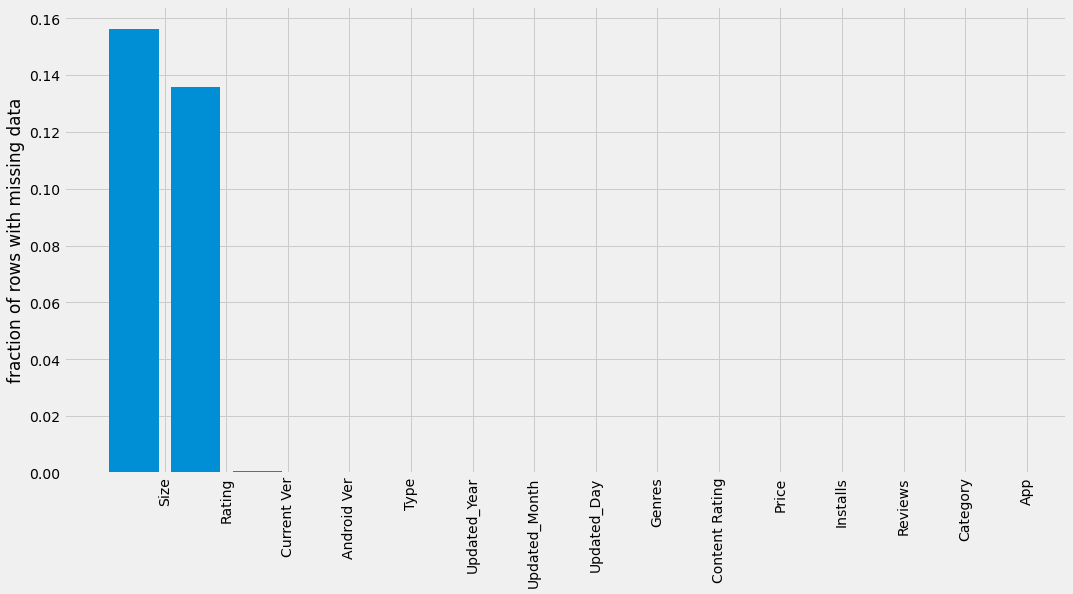

In [301]:
null_counts = data.isna().sum().sort_values(ascending=False)/len(data)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

* I Clean missing values using Random Value Imputation Because This the best way to To maintain distrbuation For each feature.

In [302]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [303]:
for col in data:
    Random_value_imputation(col)

In [304]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

Null Values  Percentage Null Values
Updated_Year              0                     0.0
Updated_Month             0                     0.0
Updated_Day               0                     0.0
Android Ver               0                     0.0
Current Ver               0                     0.0
Genres                    0                     0.0
Content Rating            0                     0.0
Price                     0                     0.0
Type                      0                     0.0
Installs                  0                     0.0
Size                      0                     0.0
Reviews                   0                     0.0
Rating                    0                     0.0
Category                  0                     0.0
App                       0                     0.0

<BarContainer object of 15 artists>

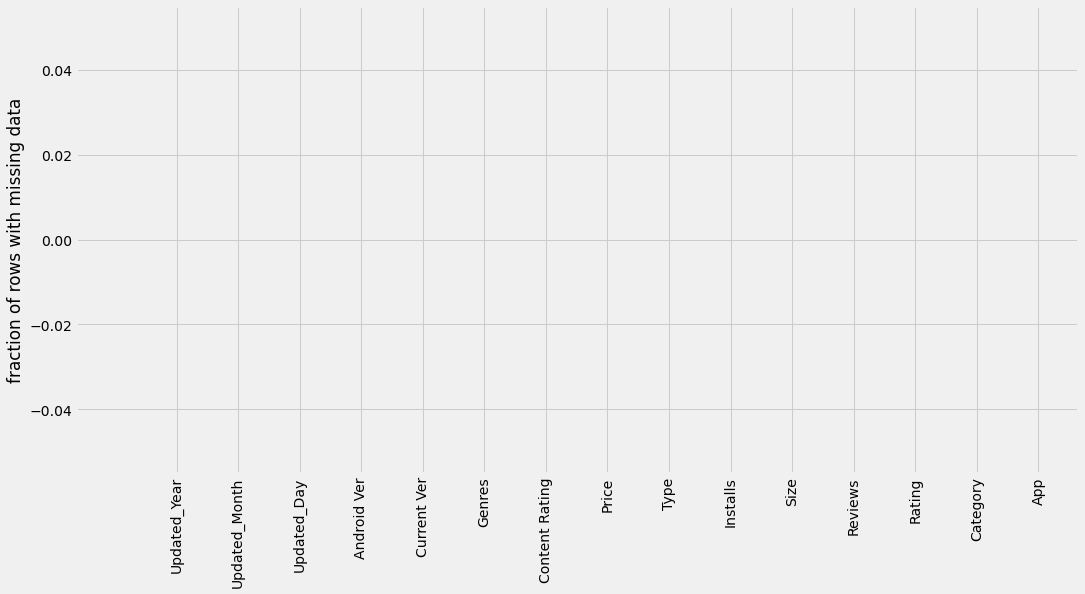

In [305]:
null_counts = data.isna().sum().sort_values(ascending=False)/len(data)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>delete data duplicated</strong></p>

In [306]:
duplicate = data.duplicated()
print(duplicate.sum())

310


In [307]:
data.drop_duplicates(inplace=True)

In [308]:
duplicate = data.duplicated()
print(duplicate.sum())

0


<a id = '5.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong> Extract Numerical & Categorical Features</strong></p>      

In [309]:
num_features=[col for col in data.columns if data[col].dtype!='O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Day',
 'Updated_Month',
 'Updated_Year']

In [310]:
num_data = data[num_features]
num_data.head()

Rating  Reviews  Size  Installs  Price  Updated_Day  Updated_Month  \
0     4.1      159  19.0     10000    0.0            7              1   
1     3.9      967  14.0    500000    0.0           15              1   
2     4.7    87510   8.7   5000000    0.0            1              8   
3     4.5   215644  25.0  50000000    0.0            8              6   
4     4.3      967   2.8    100000    0.0           20              6   

   Updated_Year  
0          2018  
1          2018  
2          2018  
3          2018  
4          2018

In [311]:
cat_features=[col for col in data.columns if data[col].dtype=='O']
cat_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [312]:
categorical=data[cat_features]
categorical.head()

App        Category  Type  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN  Free   
1                                Coloring book moana  ART_AND_DESIGN  Free   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN  Free   
3                              Sketch - Draw & Paint  ART_AND_DESIGN  Free   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN  Free   

  Content Rating                     Genres         Current Ver   Android Ver  
0       Everyone               Art & Design               1.0.0  4.0.3 and up  
1       Everyone  Art & Design;Pretend Play               2.0.0  4.0.3 and up  
2       Everyone               Art & Design               1.2.4  4.0.3 and up  
3           Teen               Art & Design  Varies with device    4.2 and up  
4       Everyone    Art & Design;Creativity                 1.1    4.4 and up

<a id = '7.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Check Qutliers</strong></p>

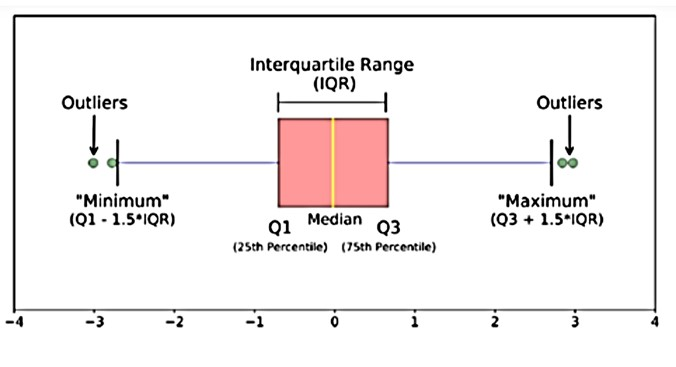

In [313]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [314]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    print(variable, "no")

In [315]:
for col in num_data.columns:
    has_outliers(num_data, col)

Rating yes
Rating no
Reviews yes
Reviews no
Size no
Installs yes
Installs no
Price yes
Price no
Updated_Day no
Updated_Month no
Updated_Year yes
Updated_Year no


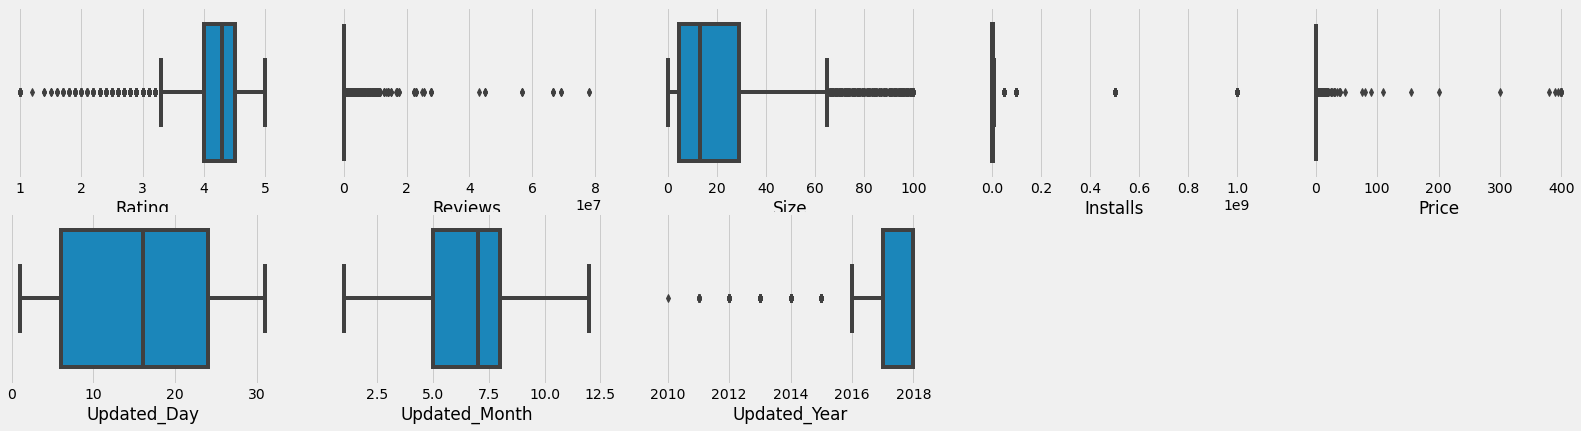

In [316]:
plt.figure(figsize=(25,10))
for i,col in enumerate(num_data.columns):
    plt.subplot(3,5,i+1)
    sns.boxplot(num_data[col])

In [317]:
## function to get ride of qutliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [318]:
replace_with_thresholds(num_data, num_data.columns)

In [319]:
for col in num_data.columns:
    has_outliers(num_data, col)

Rating no
Reviews no
Size no
Installs no
Price no
Updated_Day no
Updated_Month no
Updated_Year no


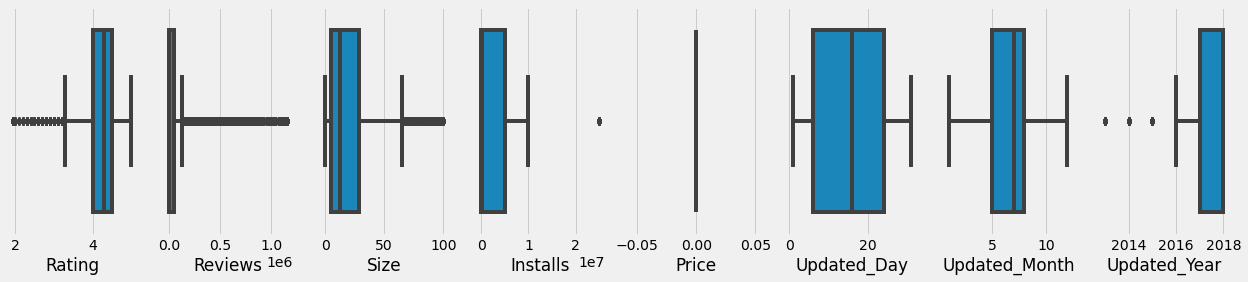

In [320]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_data.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_data[col])

In [321]:
#create_report(data)

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p>

###  What is EDA ?
is an approach for data analysis that emeploys a variety of technics (mostly graphical) to  
*  maximize insight into a dataset
*   uncover underlying structure     
*   extract important variables      
*   answer questions 

### EDA Checklist
1. What question(s) are you trying to solve ? 
2. What kind of data do you have and how do you treat different types? 
3. What do you get after visualize your data?
4. What is your observation 

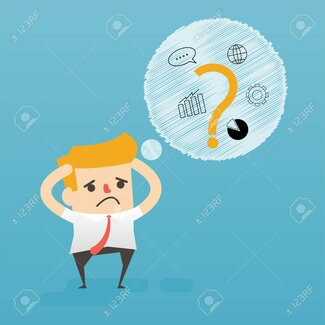

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Category Column</strong></p>

In [322]:
categorical['Category'].value_counts()

FAMILY                 1946
GAME                   1129
TOOLS                   843
BUSINESS                439
PRODUCTIVITY            420
MEDICAL                 413
PERSONALIZATION         391
COMMUNICATION           382
LIFESTYLE               375
SPORTS                  369
FINANCE                 363
PHOTOGRAPHY             324
HEALTH_AND_FITNESS      316
SOCIAL                  288
NEWS_AND_MAGAZINES      276
TRAVEL_AND_LOCAL        245
SHOPPING                240
BOOKS_AND_REFERENCE     230
DATING                  202
VIDEO_PLAYERS           175
EDUCATION               140
MAPS_AND_NAVIGATION     137
ENTERTAINMENT           126
FOOD_AND_DRINK          125
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

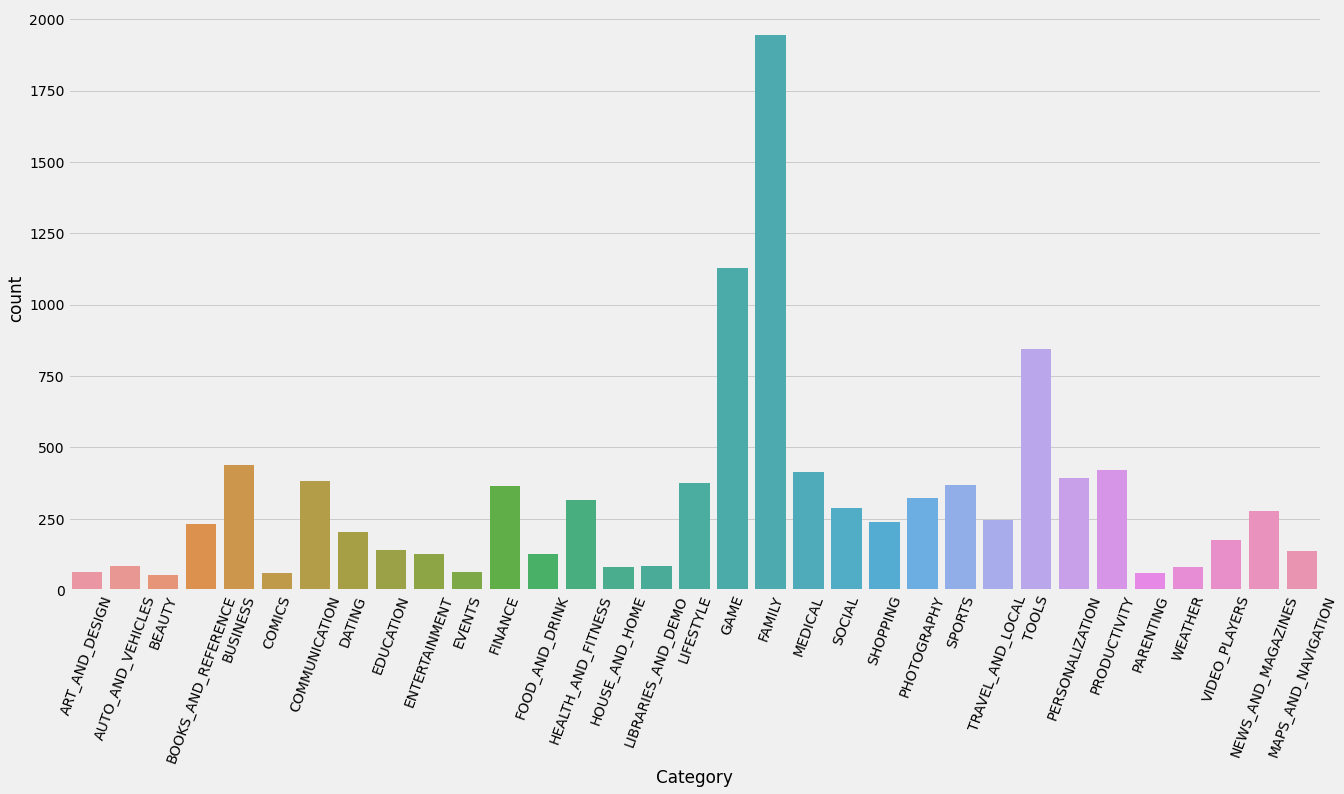

In [323]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=data)
plt.xticks(rotation=70)

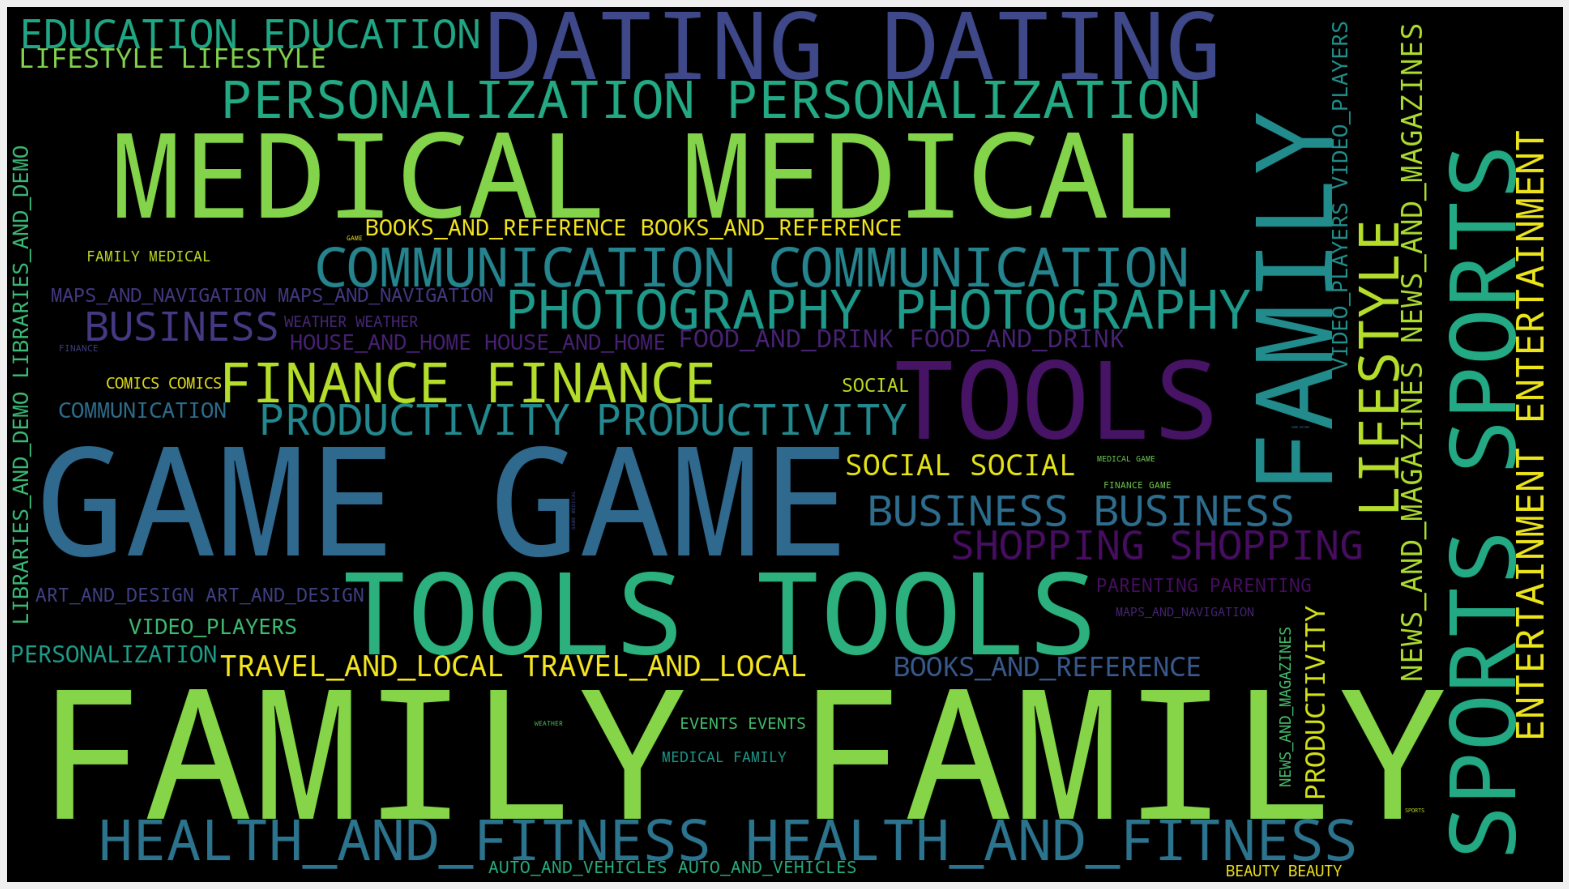

In [324]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [325]:
Category1 = data[data.Category=="GAME"].Rating
Category2 = data[data.Category=="FAMILY"].Rating
Category3 = data[data.Category=="MEDICAL"].Rating

fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(x=Category1, name='GAME'))
fig.add_trace(go.Box(x=Category2, name='FAMILY'))
fig.add_trace(go.Box(x=Category3, name='MEDICAL'))

fig.show()

### Category vs Rating Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'NEWS_AND_MAGAZINES'),
  Text(1, 0, 'TOOLS'),
  Text(2, 0, 'COMMUNICATION'),
  Text(3, 0, 'FAMILY'),
  Text(4, 0, 'EVENTS'),
  Text(5, 0, 'BUSINESS'),
  Text(6, 0, 'FINANCE'),
  Text(7, 0, 'SOCIAL'),
  Text(8, 0, 'PRODUCTIVITY'),
  Text(9, 0, 'MEDICAL'),
  Text(10, 0, 'HEALTH_AND_FITNESS'),
  Text(11, 0, 'LIFESTYLE'),
  Text(12, 0, 'SPORTS'),
  Text(13, 0, 'GAME'),
  Text(14, 0, 'SHOPPING'),
  Text(15, 0, 'PERSONALIZATION'),
  Text(16, 0, 'COMICS'),
  Text(17, 0, 'VIDEO_PLAYERS'),
  Text(18, 0, 'PHOTOGRAPHY'),
  Text(19, 0, 'BOOKS_AND_REFERENCE'),
  Text(20, 0, 'LIBRARIES_AND_DEMO'),
  Text(21, 0, 'FOOD_AND_DRINK'),
  Text(22, 0, 'PARENTING'),
  Text(23, 0, 'TRAVEL_AND_LOCAL'),
  Text(24, 0, 'DATING'),
  Text(25, 0, 'ART_AND_DESIGN'),
  Text(26, 0, 'AUTO_AND_VEHICLES'),
  Text(27, 0, 'MAPS_AND_NAVIGATION'),
  Text(28, 0, 'BEA

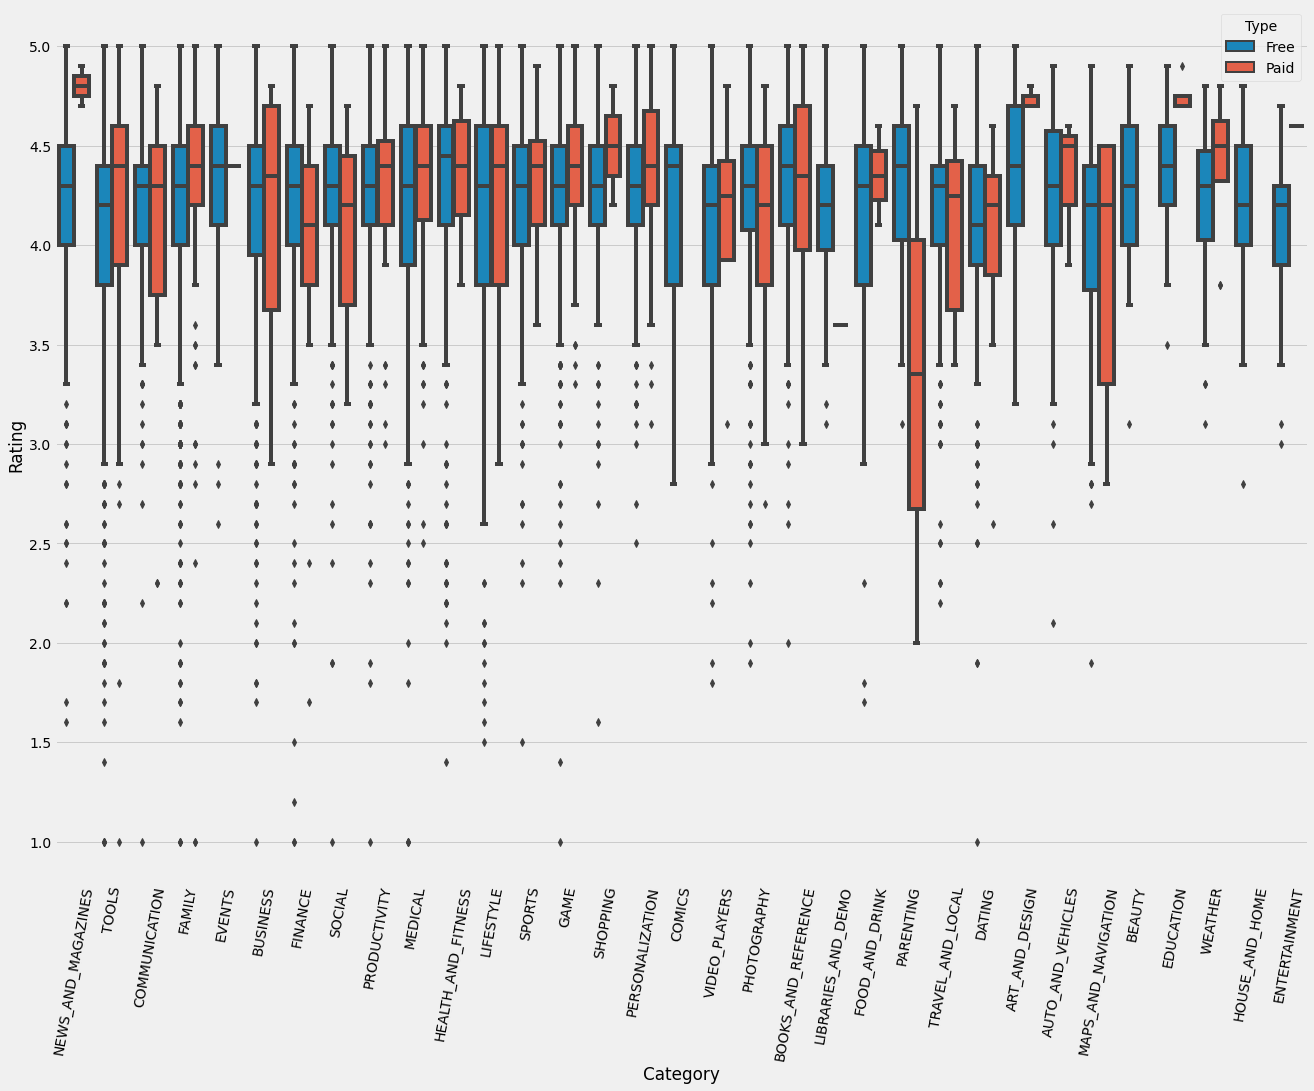

In [326]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = data.sort_values('Rating',ascending=False),hue='Type')
plt.xticks(rotation=80)

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Type Column</strong></p>

In [327]:
categorical['Type'].value_counts()

Free    9762
Paid     768
Name: Type, dtype: int64

(array([0, 1]), [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

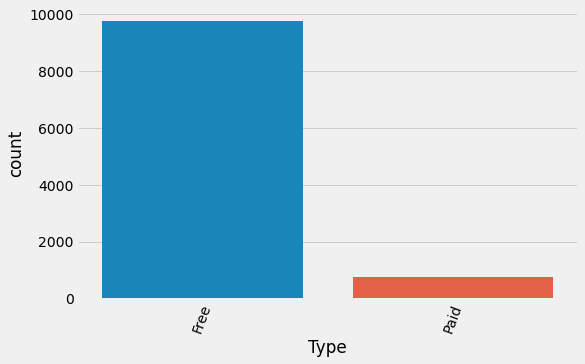

In [328]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=data)
plt.xticks(rotation=70)

<AxesSubplot:xlabel='Type', ylabel='Installs'>

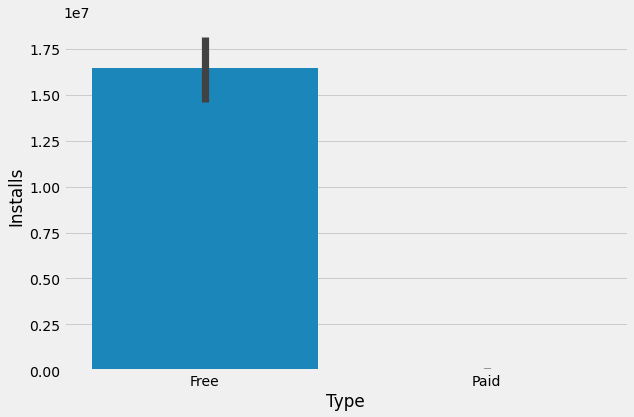

In [329]:
plt.figure(figsize=(9,6))

sns.barplot(x="Type", y="Installs", data=data)

Text(0.5, 1.0, 'Free vs Paid apps')

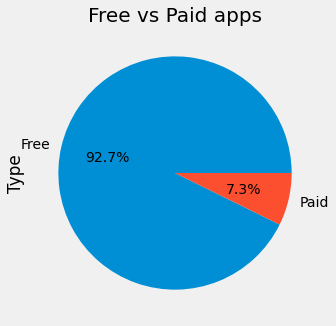

In [330]:
data["Type"].value_counts().plot.pie(autopct = "%1.1f%%")
plt.title('Free vs Paid apps',size = 20)

### Type vs Rating Analysis

<AxesSubplot:xlabel='Type', ylabel='Rating'>

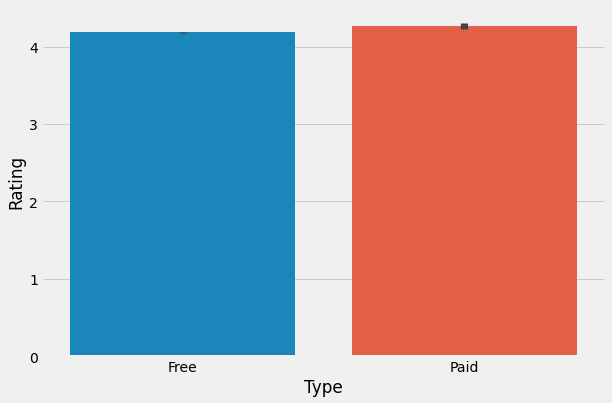

In [331]:
plt.figure(figsize=(9,6))

sns.barplot(x="Type", y="Rating", data=data)

<Figure size 1080x576 with 0 Axes>

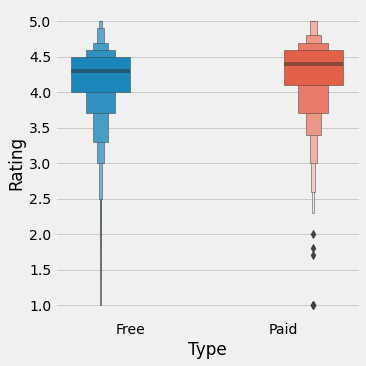

In [332]:
plt.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = data.sort_values('Rating',ascending=False),kind='boxen',hue='Type')

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Content Rating Column</strong></p>

In [333]:
categorical['Content Rating'].value_counts()

Everyone           8495
Teen               1172
Mature 17+          463
Everyone 10+        395
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

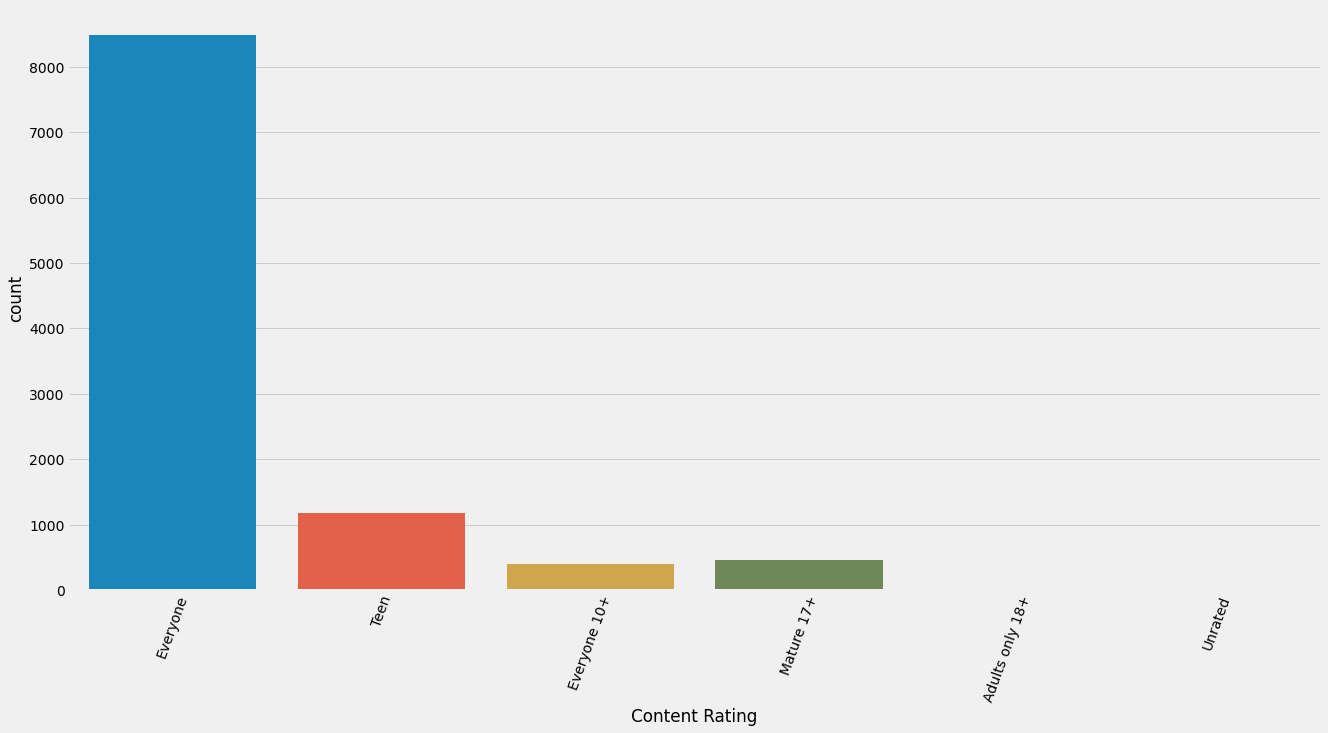

In [334]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Content Rating',data=data)
plt.xticks(rotation=70)

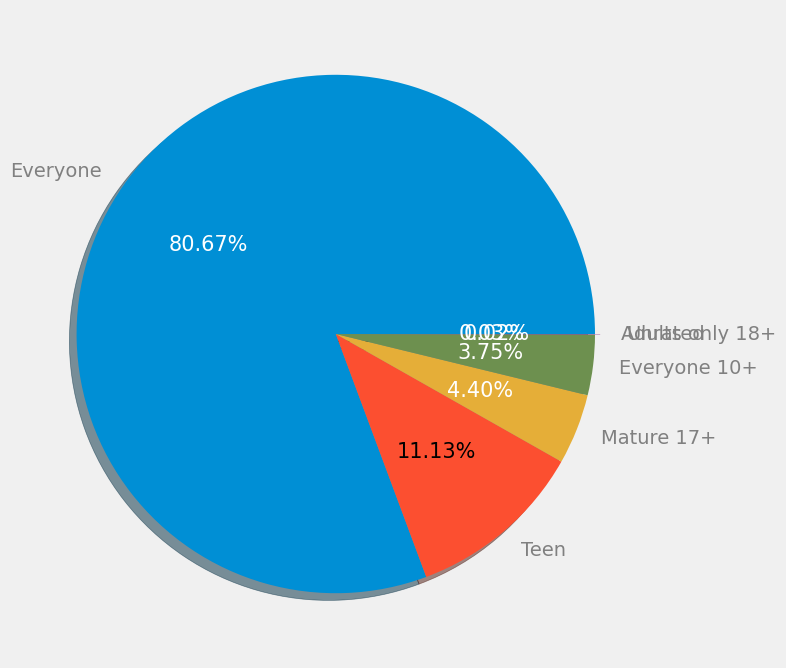

In [335]:
# pie chart
values = data['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Mature 17+','Everyone 10+','Adults only 18+','Unrated']

fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
explode = (0,0,0,0,0,.02)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 0, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 15, color = 'white')
autotexts[1].set_color('black')
plt.show()

### Content Rating vs Rating Analysis

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Mature 17+'),
  Text(3, 0, 'Everyone 10+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

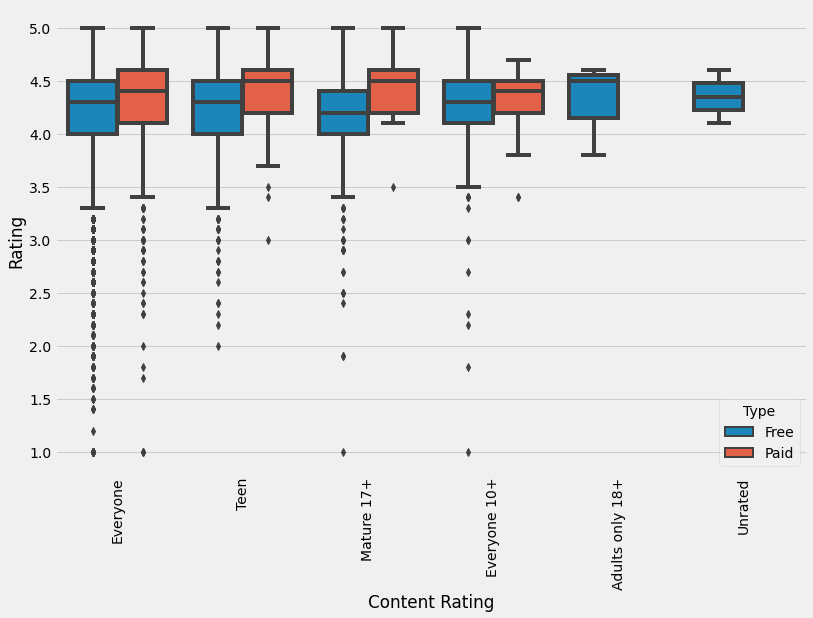

In [336]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Rating',x='Content Rating',data = data.sort_values('Rating',ascending=False) ,hue='Type')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

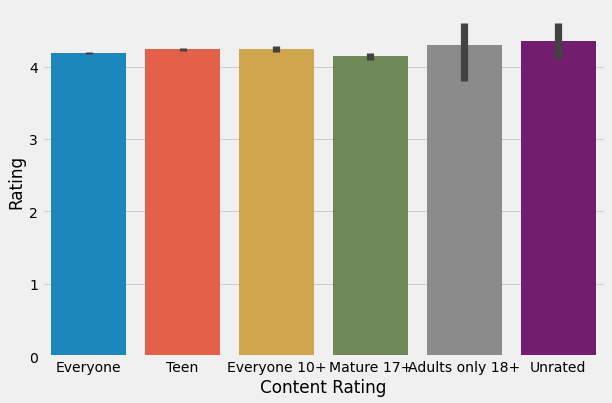

In [337]:
plt.figure(figsize=(9,6))

sns.barplot(x="Content Rating", y="Rating", data=data)

<AxesSubplot:xlabel='Content Rating', ylabel='Installs'>

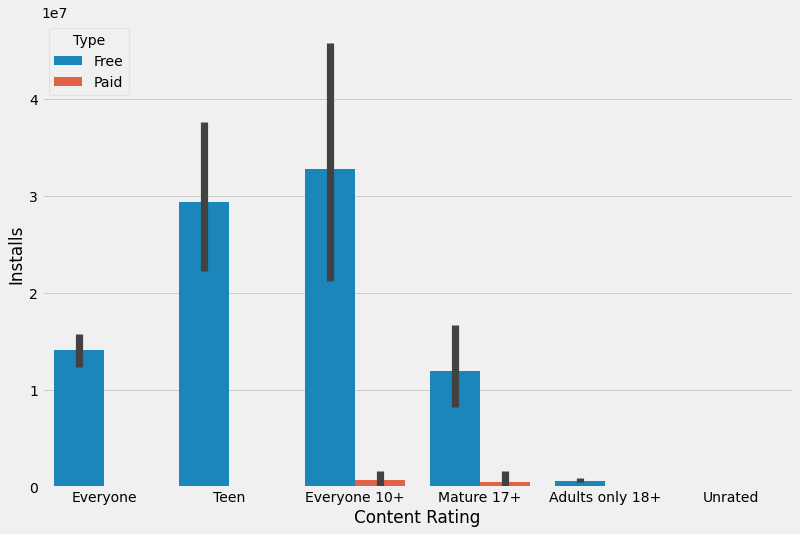

In [338]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=data)

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Genres Column</strong></p>

In [339]:
categorical['Genres'].value_counts()

Tools                                  842
Entertainment                          603
Education                              535
Business                               439
Productivity                           420
                                      ... 
Entertainment;Education                  1
Lifestyle;Pretend Play                   1
Card;Brain Games                         1
Health & Fitness;Action & Adventure      1
Strategy;Creativity                      1
Name: Genres, Length: 119, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118]),
 [Text(0, 0, 'Art & Design'),
  Text(1, 0, 'Art & Design;Pretend Play'),
  Text(2, 0, 'Art & Design;Creativity'),
  Text(3, 0, 'Art & Design;Action & Adventure'),
  Text(4, 0, 'Auto & Vehicles'),
  Text(5, 0, 'Beauty'),
  Text(6, 0, 'Books & Reference'),
  Text(7, 0, 'Business'),
  Text(8, 0, 'Comics'),
  Text(9, 0, 'Comi

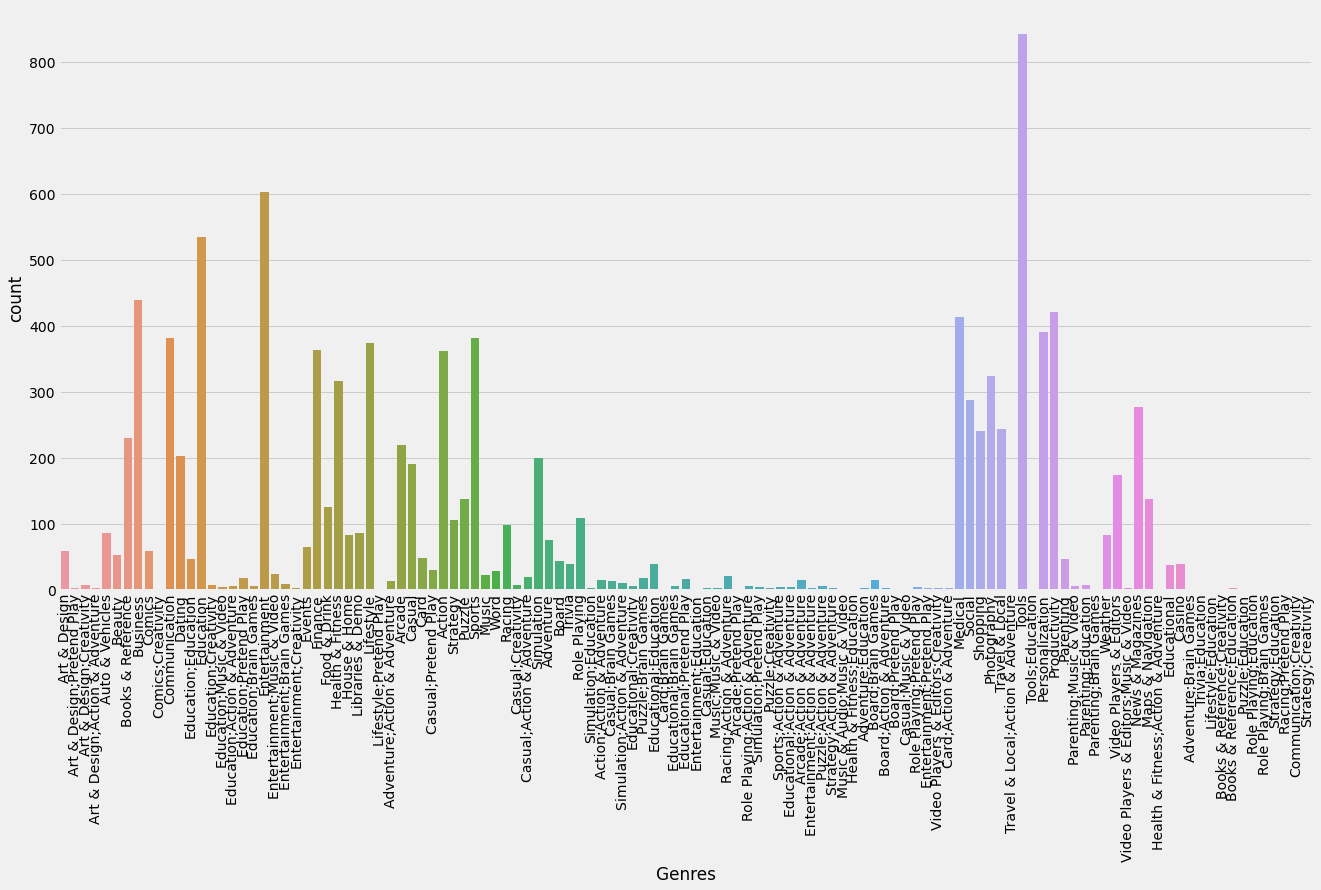

In [340]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Genres',data=data)
plt.xticks(rotation=90)

### Content Rating vs Genres Analysis

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118]),
 [Text(0, 0, 'News & Magazines'),
  Text(1, 0, 'Tools'),
  Text(2, 0, 'Communication'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'Events'),
  Text(5, 0, 'Casual'),
  Text(6, 0, 'Business'),
  Text(7, 0, 'Finance'),
  Text(8, 0, 'Entertainment'),
  Text(9, 0, 'Social'),
  Text(10, 0, 'Productivity'),
  Text(11, 0, 'Medical'

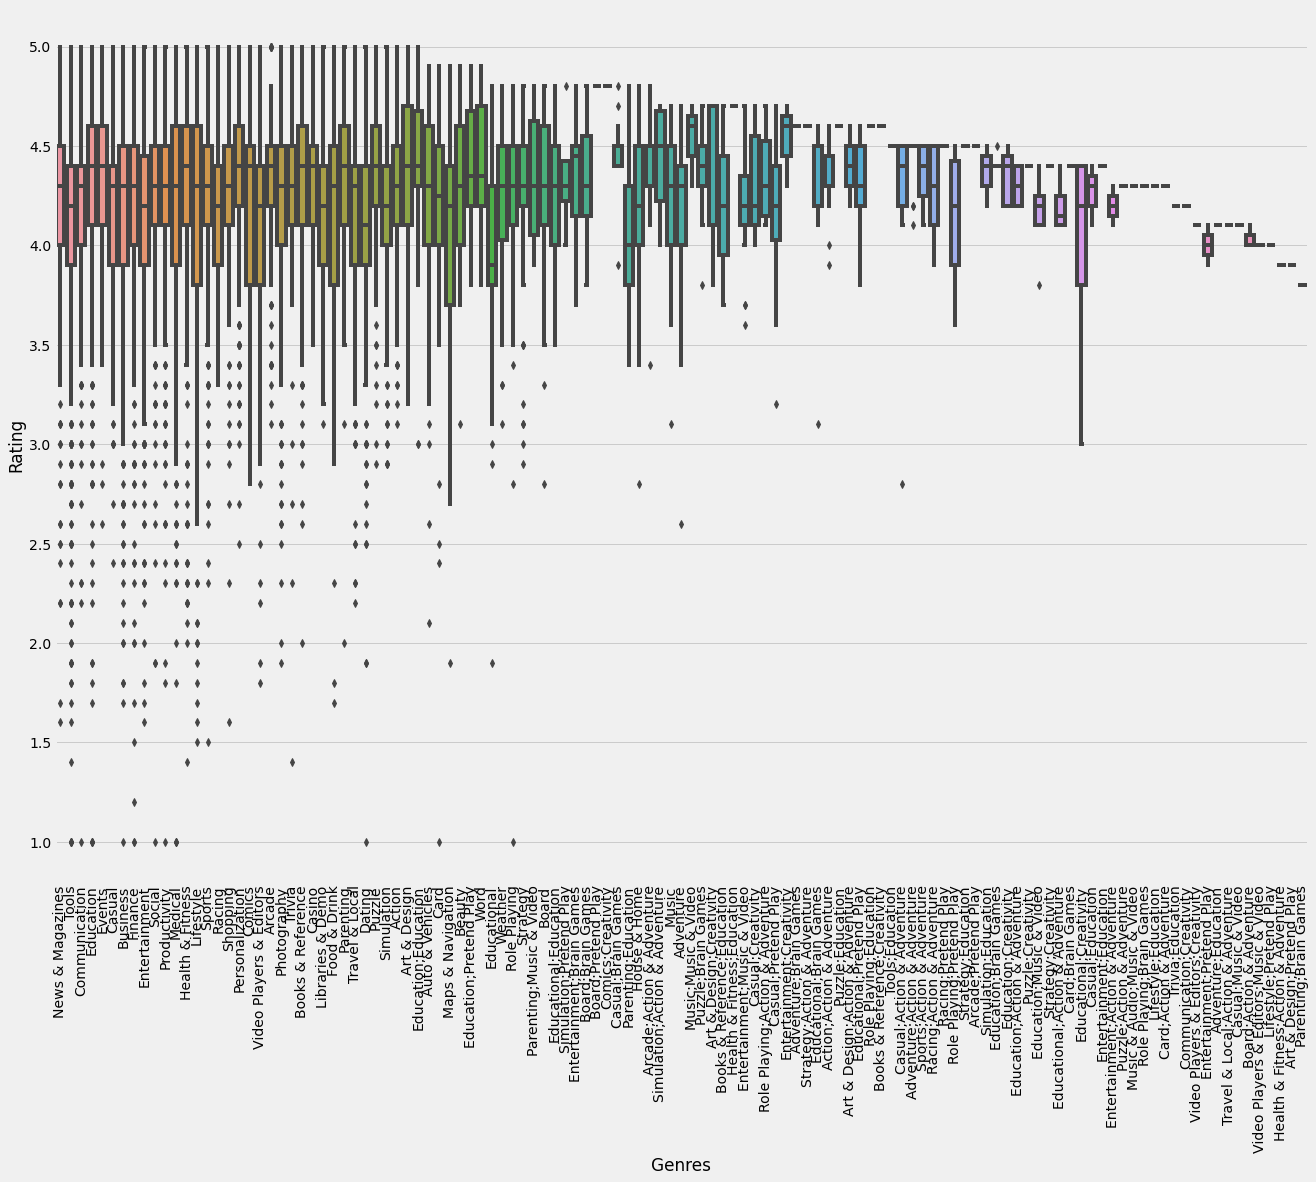

In [341]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Genres',data = data.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Current Ver Column</strong></p>

In [342]:
categorical['Current Ver'].value_counts()

Varies with device                      1452
1.0                                      802
1.1                                      260
1.2                                      178
2.0                                      149
                                        ... 
69.1                                       1
fcbd82b2-dd5b-41d2-af62-432271c42921       1
1.0.32                                     1
5.3.6.0                                    1
2.28.1                                     1
Name: Current Ver, Length: 2831, dtype: int64

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Android Ver Column</strong></p>

In [343]:
categorical['Android Ver'].value_counts()

4.1 and up            2386
4.0.3 and up          1457
Varies with device    1358
4.0 and up            1339
4.4 and up             905
2.3 and up             644
5.0 and up             557
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
7.0 - 7.1.1              1
5.0 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '4.0.3 and up'),
  Text(1, 0, '4.2 and up'),
  Text(2, 0, '4.4 and up'),
  Text(3, 0, '2.3 and up'),
  Text(4, 0, '3.0 and up'),
  Text(5, 0, '4.1 and up'),
  Text(6, 0, '4.0 and up'),
  Text(7, 0, '2.3.3 and up'),
  Text(8, 0, 'Varies with device'),
  Text(9, 0, '2.2 and up'),
  Text(10, 0, '5.0 and up'),
  Text(11, 0, '6.0 and up'),
  Text(12, 0, '1.6 and up'),
  Text(13, 0, '1.5 and up'),
  Text(14, 0, '2.1 and up'),
  Text(15, 0, '7.0 and up'),
  Text(16, 0, '5.1 and up'),
  Text(17, 0, '4.3 and up'),
  Text(18, 0, '4.0.3 - 7.1.1'),
  Text(19, 0, '2.0 and up'),
  Text(20, 0, '3.2 and up'),
  Text(21, 0, '4.4W and up'),
  Text(22, 0, '7.1 and up'),
  Text(23, 0, '7.0 - 7.1.1'),
  Text(24, 0, '8.0 and up'),
  Text(25, 0, '5.0 - 8.0'),
  Text(26, 0, '3.1 and up'),
  Text(27, 0, '2.0.1 and up'),
  Text(28, 0, '4.1 - 7.1.1'),


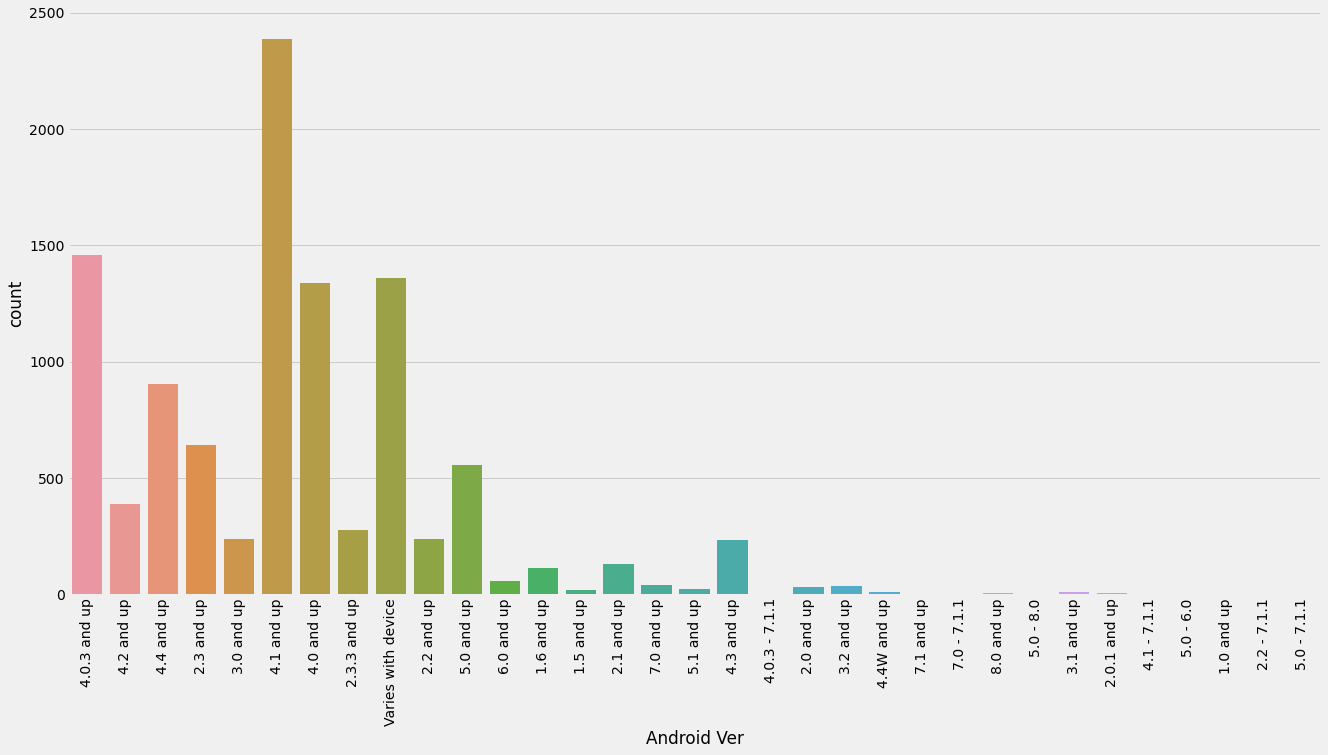

In [344]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Android Ver',data=data)
plt.xticks(rotation=90)

### Content Rating vs Android Ver Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '4.4 and up'),
  Text(1, 0, '2.3 and up'),
  Text(2, 0, '4.0.3 and up'),
  Text(3, 0, '4.0 and up'),
  Text(4, 0, '5.1 and up'),
  Text(5, 0, '4.3 and up'),
  Text(6, 0, '5.0 and up'),
  Text(7, 0, '4.1 and up'),
  Text(8, 0, '4.2 and up'),
  Text(9, 0, '2.3.3 and up'),
  Text(10, 0, 'Varies with device'),
  Text(11, 0, '3.0 and up'),
  Text(12, 0, '2.2 and up'),
  Text(13, 0, '3.2 and up'),
  Text(14, 0, '1.6 and up'),
  Text(15, 0, '2.0 and up'),
  Text(16, 0, '2.1 and up'),
  Text(17, 0, '2.0.1 and up'),
  Text(18, 0, '8.0 and up'),
  Text(19, 0, '7.0 and up'),
  Text(20, 0, '6.0 and up'),
  Text(21, 0, '4.4W and up'),
  Text(22, 0, '1.5 and up'),
  Text(23, 0, '3.1 and up'),
  Text(24, 0, '7.1 and up'),
  Text(25, 0, '5.0 - 8.0'),
  Text(26, 0, '1.0 and up'),
  Text(27, 0, '5.0 - 7.1.1'),
  Text(28, 0, '5.0 - 6.0'),
  Tex

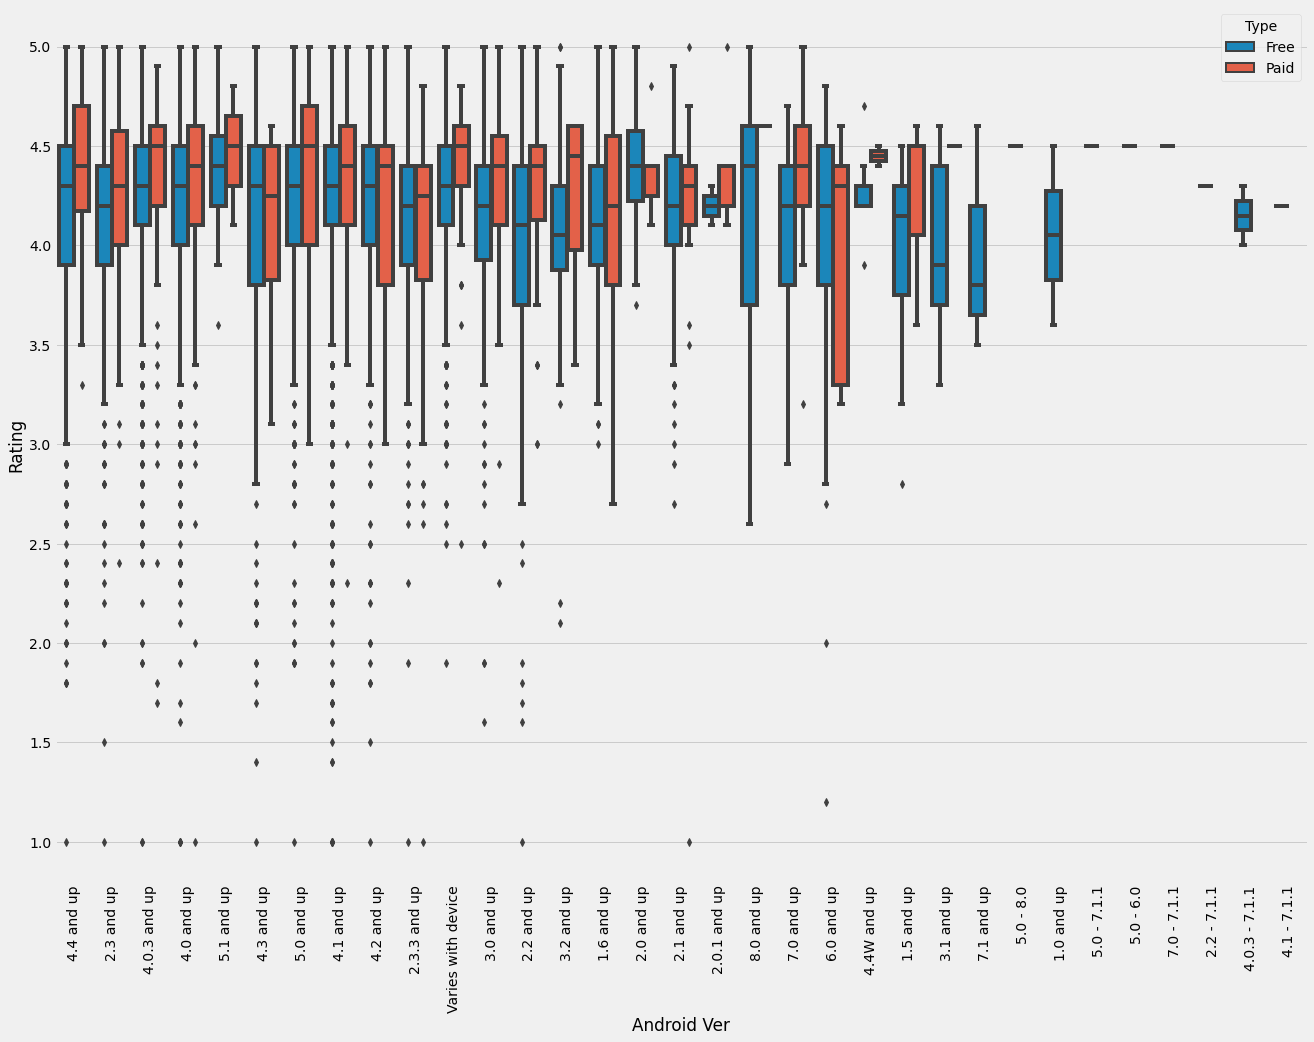

In [345]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Android Ver',data = data.sort_values('Rating',ascending=False),hue='Type')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '4.0.3 and up'),
  Text(1, 0, '4.2 and up'),
  Text(2, 0, '4.4 and up'),
  Text(3, 0, '2.3 and up'),
  Text(4, 0, '3.0 and up'),
  Text(5, 0, '4.1 and up'),
  Text(6, 0, '4.0 and up'),
  Text(7, 0, '2.3.3 and up'),
  Text(8, 0, 'Varies with device'),
  Text(9, 0, '2.2 and up'),
  Text(10, 0, '5.0 and up'),
  Text(11, 0, '6.0 and up'),
  Text(12, 0, '1.6 and up'),
  Text(13, 0, '1.5 and up'),
  Text(14, 0, '2.1 and up'),
  Text(15, 0, '7.0 and up'),
  Text(16, 0, '5.1 and up'),
  Text(17, 0, '4.3 and up'),
  Text(18, 0, '4.0.3 - 7.1.1'),
  Text(19, 0, '2.0 and up'),
  Text(20, 0, '3.2 and up'),
  Text(21, 0, '4.4W and up'),
  Text(22, 0, '7.1 and up'),
  Text(23, 0, '7.0 - 7.1.1'),
  Text(24, 0, '8.0 and up'),
  Text(25, 0, '5.0 - 8.0'),
  Text(26, 0, '3.1 and up'),
  Text(27, 0, '2.0.1 and up'),
  Text(28, 0, '4.1 - 7.1.1'),


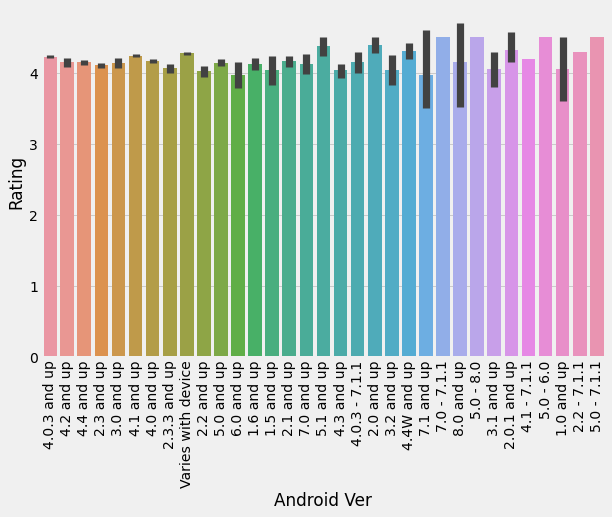

In [346]:
plt.figure(figsize=(9,6))

sns.barplot(x="Android Ver", y="Rating", data=data)
plt.xticks(rotation=90)

Rating	Reviews	Size	Installs	Price	Updated_Day	Updated_Month	Updated_Year

* Rating

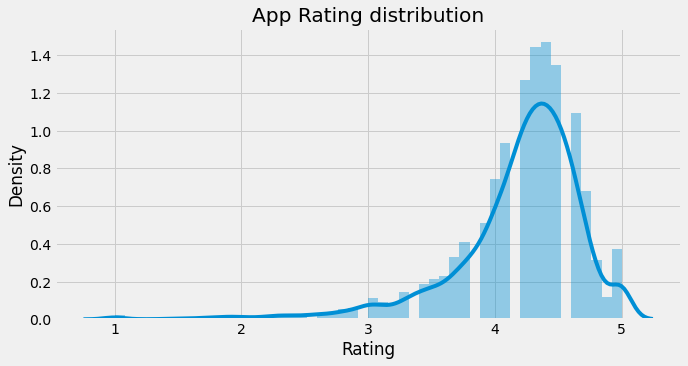

In [347]:
plt.subplots(figsize=(10,5))
sns.distplot(data['Rating'])
plt.title('App Rating distribution');

* The distribution of Rating size is left skewed.
* Mean, Median and Mode can be computed as follows:

In [348]:
print('Average app Rating is: ', data['Rating'].mean())
print('Median app Rating is: ', data['Rating'].median())
print('Mode app Rating is: ', data['Rating'].mode()[0])

Average app Rating is:  4.189145299145304
Median app Rating is:  4.3
Mode app Rating is:  4.4


#### How many apps with 2 star rating?

In [349]:
len(data[data['Rating']<=2.0])

82

* Size

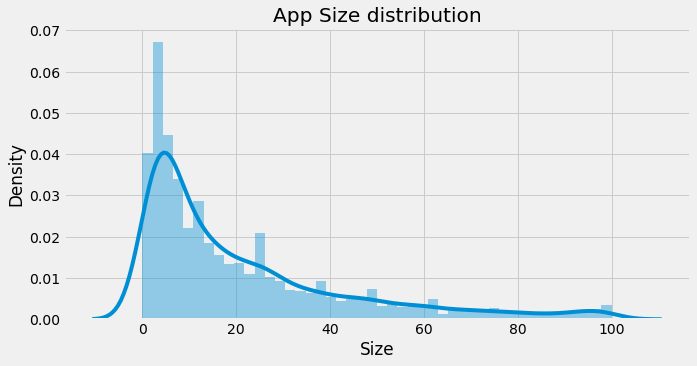

In [350]:
plt.subplots(figsize=(10,5))
sns.distplot(data['Size'])
plt.title('App Size distribution');

* The distribution of app size is right skewed.
* Mean, Median and Mode can be computed as follows:

In [351]:
print('Average app size is: ', data['Size'].mean())
print('Median app size is: ', data['Size'].median())
print('Mode app size is: ', data['Size'].mode()[0])

Average app size is:  21.343839981006543
Median app size is:  13.0
Mode app size is:  12.0


#### Relationship between Size & Rating

Text(0.5, 1.0, 'Regression plot for Size & Rating')

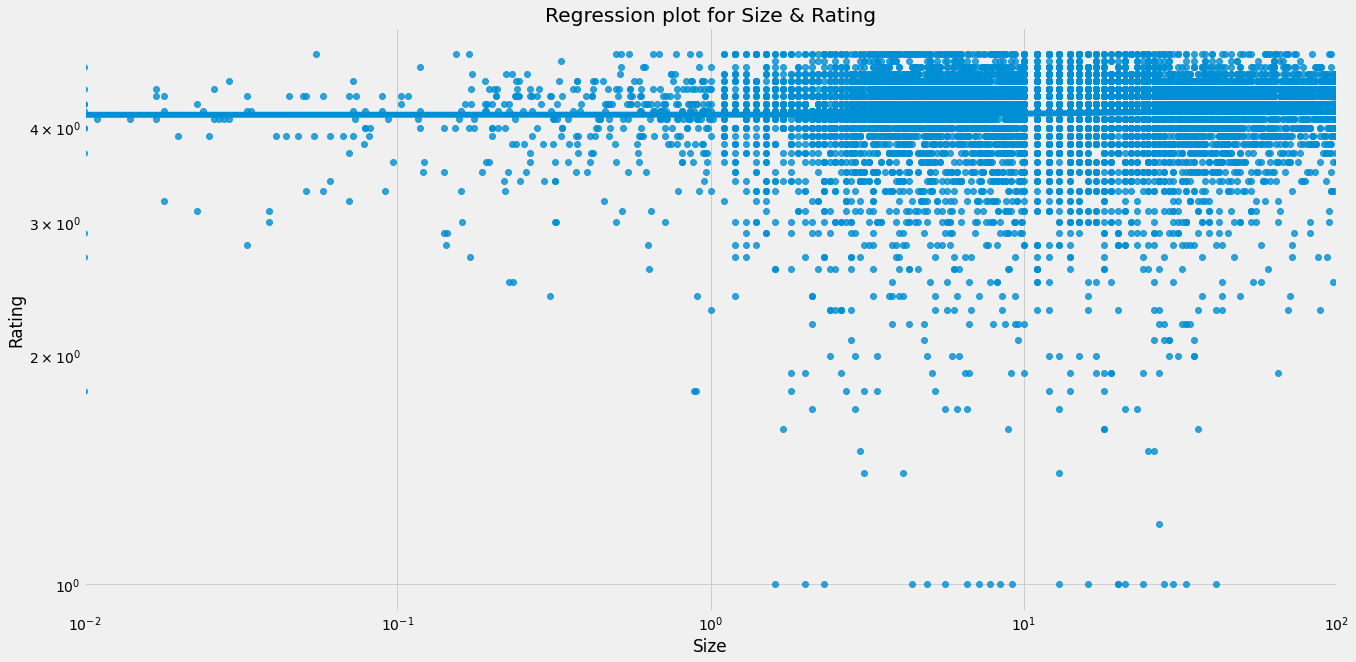

In [352]:
sns.regplot(data=data,x='Size',y='Rating')
plt.yscale('log')
plt.xscale('log')
plt.title('Regression plot for Size & Rating')

* `It is clear that there is no relationship between Size & Rating`

####  Relationship between Reviews & Rating

Text(0.5, 1.0, 'Regression plot for Reviews & Rating')

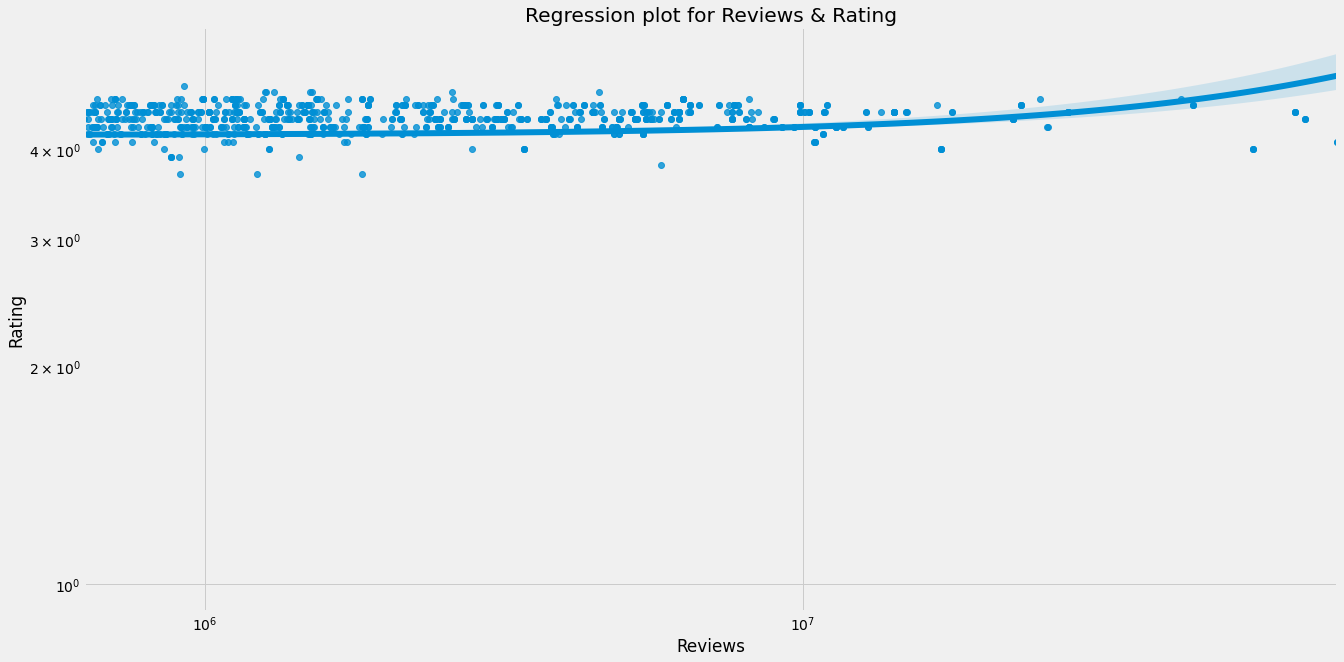

In [353]:
sns.regplot(data=data,x='Reviews',y='Rating')
plt.yscale('log')
plt.xscale('log')
plt.title('Regression plot for Reviews & Rating')

* `It is clear that there is little linear relationship between Reviews & Rating`

#### Relationship between Reviews & Installs

Text(0.5, 1.0, 'Regression plot for Reviews & Installs')

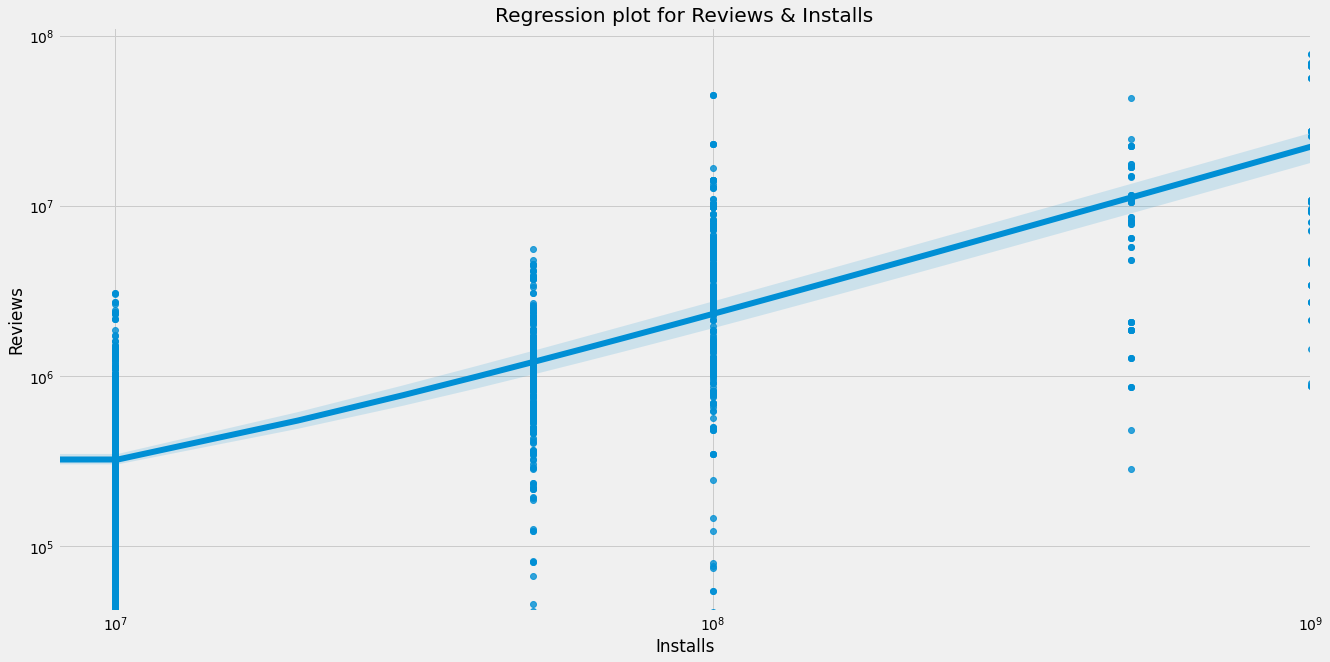

In [354]:
sns.regplot(x='Installs',y='Reviews', data=data)
plt.yscale('log')
plt.xscale('log')
plt.title('Regression plot for Reviews & Installs')

* `From this plot we can see that apps with more installs tends to have more reviews`

#### Relationship between Installs & Size

Text(0.5, 1.0, 'Regression plot for Installs & Size')

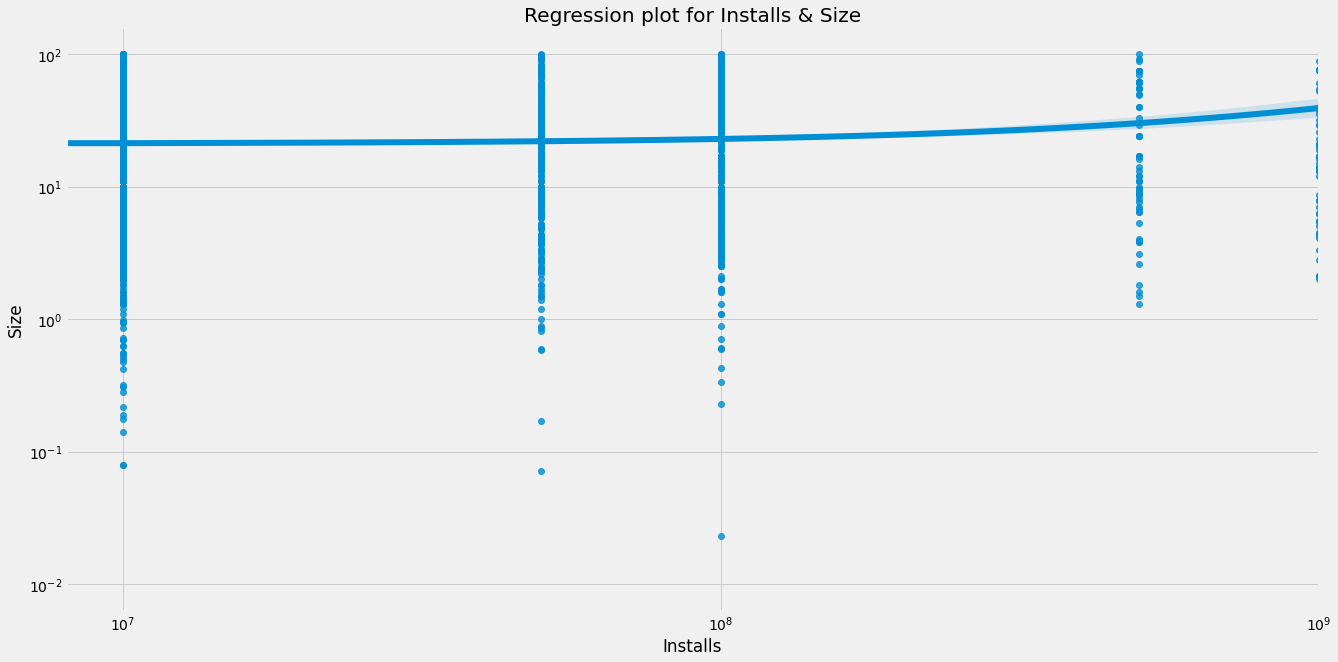

In [355]:
sns.regplot(x='Installs',y='Size', data=data)
plt.yscale('log')
plt.xscale('log')
plt.title('Regression plot for Installs & Size')

* `It is clear that there is no relationship between Size & Installs untill ``Installs = 10^8.5`` Then the value of the Size increases with an increase Installs.`

#### Relationship between Price & Installs

Text(0.5, 1.0, 'Regression plot for Price & Installs')

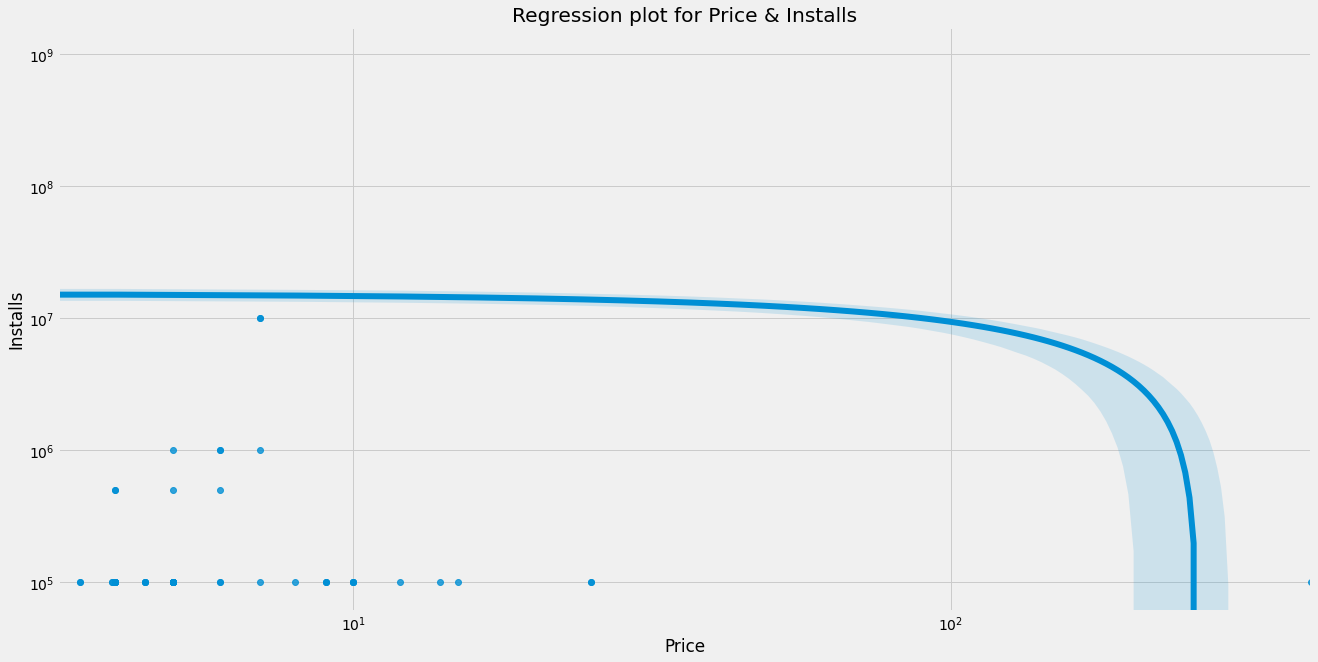

In [356]:
sns.regplot(x='Price',y='Installs', data=data)
plt.yscale('log')
plt.xscale('log')
plt.title('Regression plot for Price & Installs')

* `It is clear that there is no relationship between Price & Installs untill ``Price = 10^2`` Then the value of the Installs decreases with an increase Price.`

### Defining violin & kde_plot functions

In [357]:
def violin(col):
    fig = px.violin(data, y=col, x="Type", color="Type", box=True , template = 'plotly_dark')
    return fig.show()

def kde_plot(feature):
    grid = sns.FacetGrid(data, hue="Type",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

* kde_plot Analysis

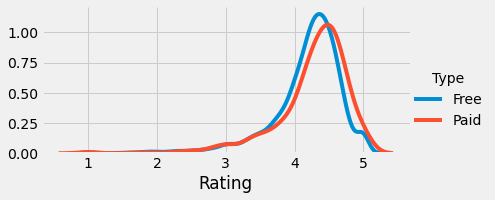

In [358]:
kde_plot('Rating')

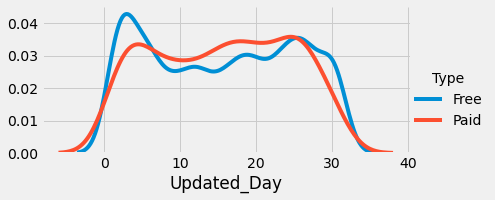

In [359]:
kde_plot('Updated_Day')

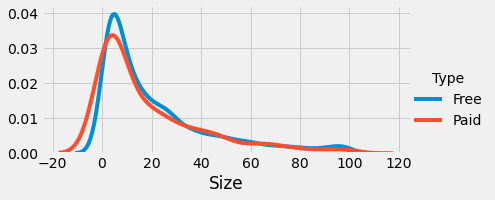

In [360]:
kde_plot('Size')

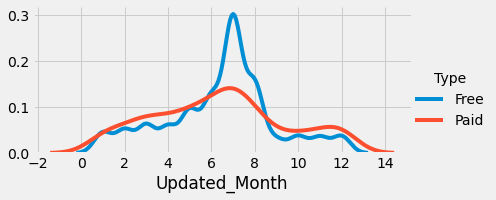

In [361]:
kde_plot('Updated_Month')

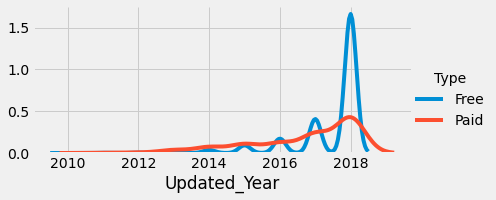

In [362]:
kde_plot('Updated_Year')

In [363]:
violin('Rating')

In [364]:
violin('Reviews')

In [365]:
violin('Size')

In [366]:
violin('Installs')

In [367]:
violin('Price')

#### What are the applications and categories with, most number of reviews, highest rating, most revenue through installs, most number of installs?

In [368]:
print("Maximum number of reviews is of : "+ data[data['Reviews']==data.Reviews.max()]["App"].iloc[0] + " with a value of " + str(data.Reviews.max()))

Maximum number of reviews is of : Facebook with a value of 78158306


In [369]:
print("Maximum price is of : "+ data[data['Price']==data.Price.max()]["App"].iloc[0] + " with a value of " + str(data.Price	.max()))

Maximum price is of : I'm Rich - Trump Edition with a value of 400.0


In [370]:
print("Maximum Rating is of : "+ data[data['Rating']==data.Rating.max()]["App"].iloc[0] + " with a value of " + str(data.Rating.max()))

Maximum Rating is of : Hojiboy Tojiboyev Life Hacks with a value of 5.0


In [371]:
print("Maximum number of installs is of : "+ data[data['Installs']==data.Installs.max()]["App"].iloc[0] + " with a value of " + str(data.Installs.max()))

Maximum number of installs is of : Google Play Books with a value of 1000000000


#### What are the categories with, most number of reviews, highest rating, most revenue through installs, most number of installs?

Text(0, 0.5, 'Number of Install')

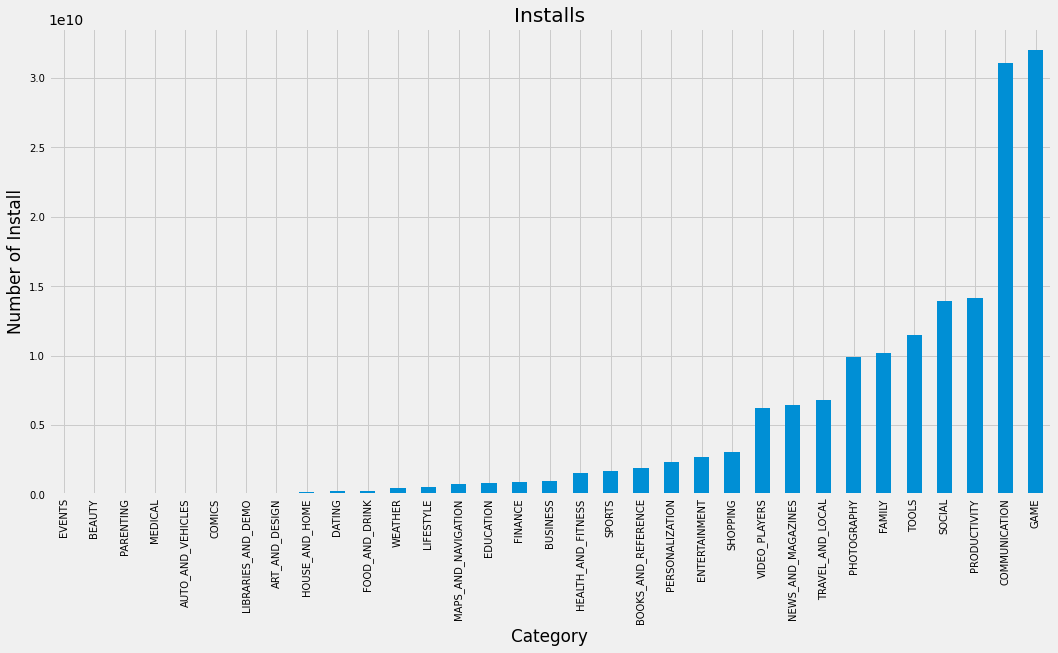

In [372]:
fig = plt.figure(figsize=(16,8)) 
data.groupby('Category').sum().sort_values(by='Installs',ascending='False')['Installs'].plot(kind='bar',title='Installs', fontsize=10)
plt.ylabel('Number of Install') 

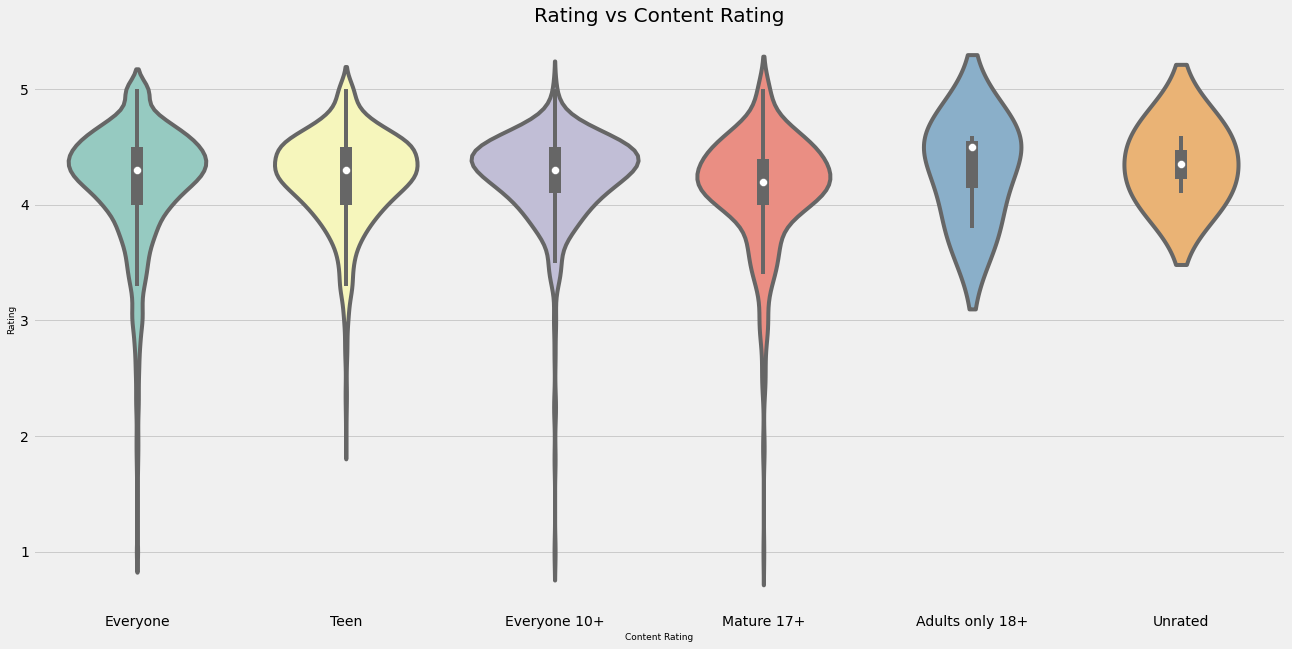

In [373]:
content_ratings = sns.violinplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,palette = "Set3")
content_ratings.set_xlabel(xlabel = 'Content Rating', fontsize = 9)
content_ratings.set_ylabel(ylabel = 'Rating', fontsize = 9)
content_ratings.set_title(label = 'Rating vs Content Rating', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Time series plot of Last Updates')

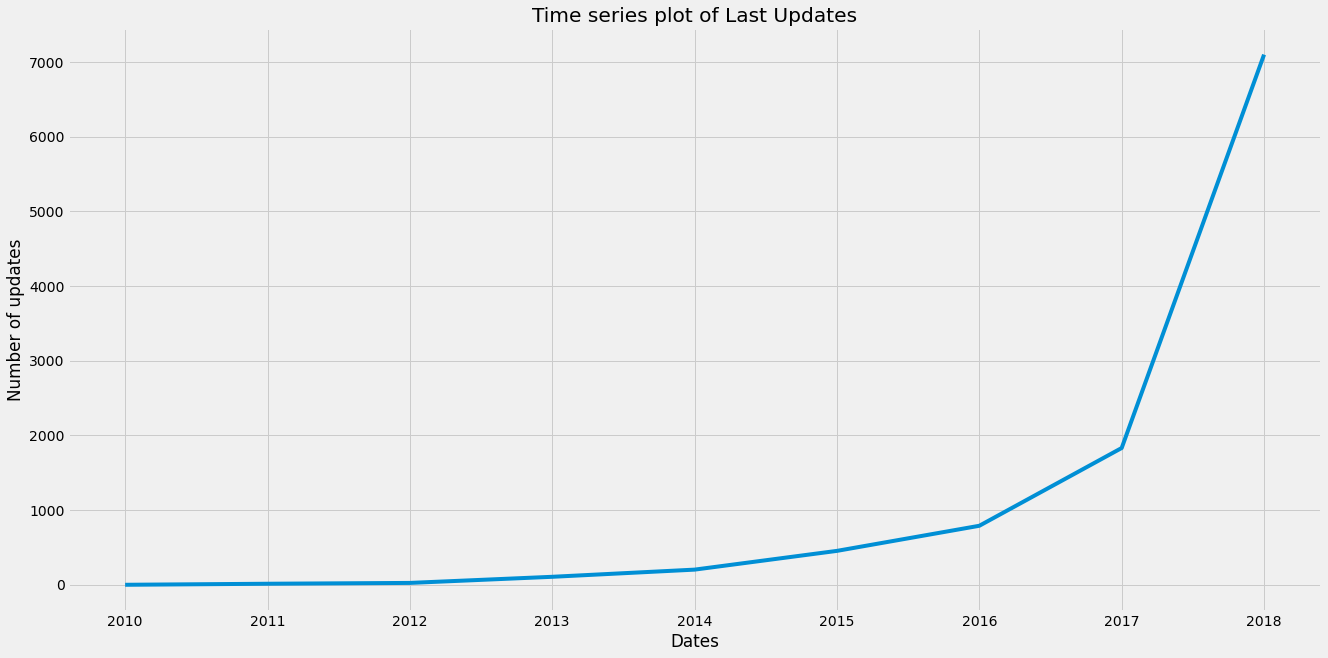

In [374]:
freq= pd.Series()
freq=data['Updated_Year'].value_counts()
freq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

* I have filtered and selected the dates on which most number of Apps were last updated.
* The above plot shows that between July 15,2018 and August 1,2018 majority of the Apps were updated as is clear by the upward trend in the graph above.

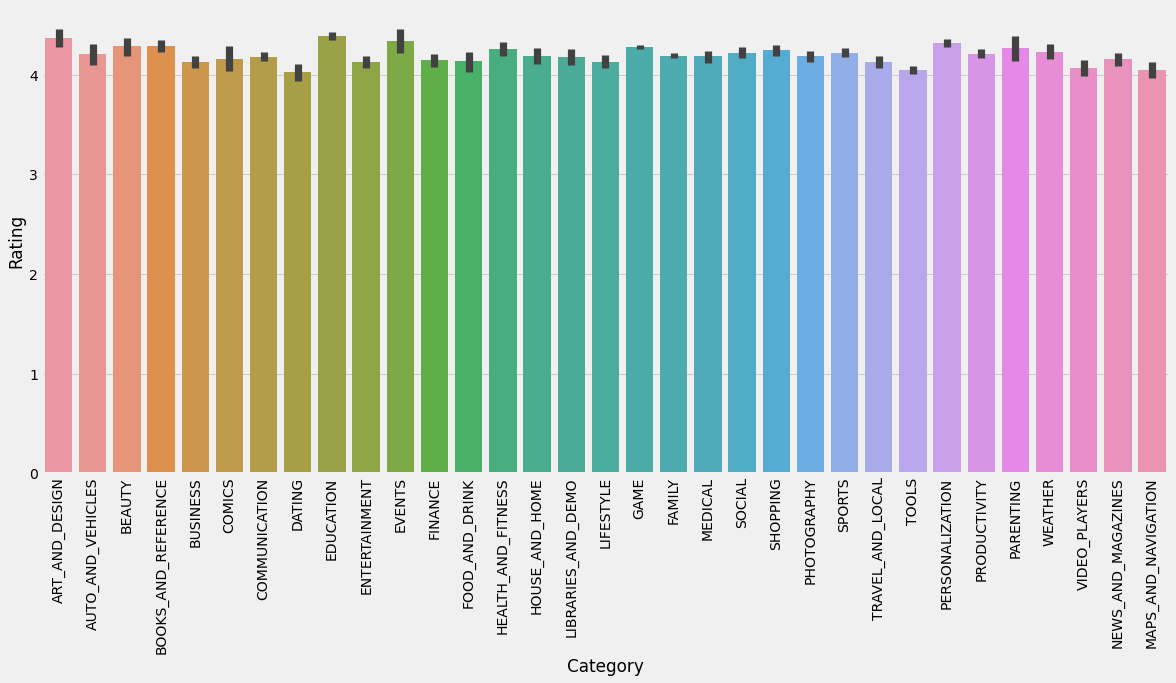

In [375]:
plt.figure(figsize=(18,8))
sns.barplot(data=data,x='Category',y='Rating')
plt.xticks(rotation=90)
plt.show()

In [376]:
px.pie(data, values='Installs', names='Category', title='Distribution of installs for different categories')

* So from this we can see that the category with the highest number of installs is gaming which is followed by communications which includes the apps like Instagram,Facebook ,etc ....



In [377]:
px.pie(data, values='Installs', names='Type', title='Distribution of installs for different categories')

* Well from this plot we can see people prefer the free applications instead of the paid applications tho it is a given haha!!


<a id = '9.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Check Co-relation</strong></p>


In [378]:
corelation = pd.DataFrame({'corelation' : data.corr(method='spearman')["Rating"].abs().sort_values(ascending=False)[1:]})
corelation

corelation
Updated_Year     0.142941
Reviews          0.113258
Price            0.062697
Size             0.052795
Installs         0.043383
Updated_Month    0.032809
Updated_Day      0.021999

<AxesSubplot:>

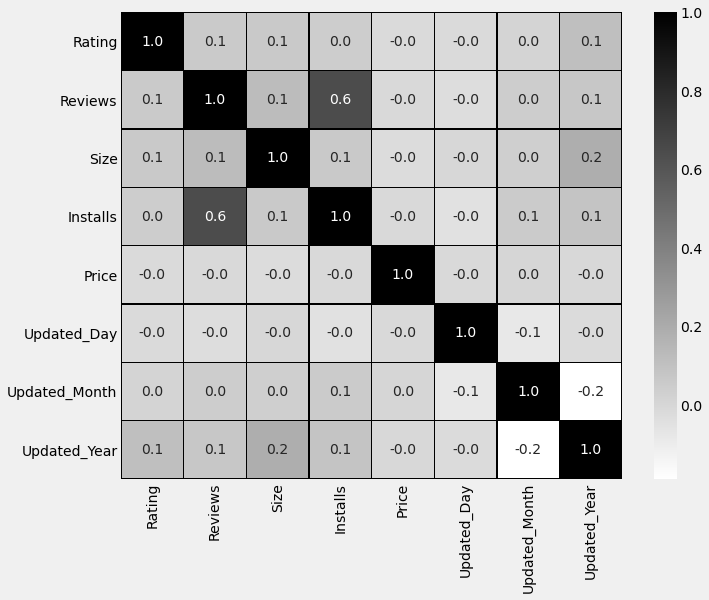

In [379]:
plt.figure(figsize=(10,8))
corelation = data.corr()
sns.heatmap(corelation,annot=True ,linewidths=0.5,linecolor="black", fmt= '.1f' ,cmap='gray_r')

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Separate dependent & independent features</strong></p>


In [380]:
y=data['Rating']
X=num_data
cols=X.columns
cols

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Updated_Day',
       'Updated_Month', 'Updated_Year'],
      dtype='object')

<a id = '7.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Splitting Dataset</strong></p>


In [381]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)

In [382]:
# Import Libraries
from sklearn.preprocessing import StandardScaler

In [383]:
#Creating a StandardScaler object to normalize the X train and test set feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


<a id = '13.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Defining function For ML model</strong></p>

In [384]:
from sklearn.ensemble import GradientBoostingRegressor

In [391]:
def predict(ml_model):          
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    print('\n')
    y_prediction=model.predict(X_test)
    print('Testing score : {}'.format(model.score(X_test,y_prediction)))
    print('\n')

    print('predictions are: \n {}'.format(y_prediction[:10]))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))


<a id = '12.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Gradient Boosting</strong></p> 


In [404]:
predict(GradientBoostingRegressor())

Training score : 0.9989423757003361


Testing score : 1.0


predictions are: 
 [4.29990943 3.90005553 4.0999927  4.09999112 4.49981582 4.79947964
 4.79945347 4.59977302 4.40073829 4.19994032]


r2 score: 0.9971736381798373
MAE: 0.0026302856219799424
MSE: 0.0007752703082578146
RMSE: 0.027843676270525315
